In [4]:
import math

# Anaysis of 3-DoF Series-Articulated Leg Topology

This notebook analyses a Jansen-mechanism based leg, with mathematics originally derived from Ingram and leg figure from Patnaik.

<img src="img/1dof-side-view.png" alt="Side view of Jansen leg mechanism from Patnaik" width="350"/>

For the development of the forward kinematics, we'll use the circle intersection method described by Ingram (and applied by Patnaik)

## Circle Intersection Method

The circle intersection method is used to find, well, the points where two circles intersect. I say circles plural because, as you can see below, there are two points of intersection for all circles which are not separated by the sum of their radii

<img src="img/1dof-circle-intersection.png" alt="Circle intersection illustration from Ingram" width="300"/>

In the case of this leg, and in order to stick to commonly used conventions, x is positive to the right (forward) and y is positive upwards.

The angle from $(x_1,y_1)$ to $(x_2,y_2)$ is defined by

$$
\theta = \tan^{-1}\big( \frac{y_2 - y_1}{x_2 - x_1} \big)
$$

The length $D$ is the distance between points $(x_1,y_1)$ to $(x_2,y_2)$

$$
D = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

The angle $\alpha$ represents the angle opposite $r_2$ in a triangle composed of $r_1$, $r_2$ and $D$. We can use cos law to find its value

$$
r_2^2 = D^2 + r_1^2 - 2 D r_1^2 \cos\alpha
\\
\alpha = \frac{D^2 + r_1^2 - r_2^2}{2 D r_1^2}
$$

Finally, the two sets of potential intersection points are given by

$$
x_{p1} = x_0 + r_1 \cos(\theta + \alpha)
\\
y_{p1} = x_0 + r_1 \sin(\theta + \alpha)
\\
x_{p2} = x_0 + r_1 \cos(\theta - \alpha)
\\
y_{p2} = x_0 + r_1 \sin(\theta - \alpha)
$$

<img src="img/1dof-positions.png" alt="Some possible leg positions from Patnaik" width="300"/>

Since there are technically two possible solutions, we'll make some observations which will allow us to select between solutions:

- The position of node 0 only relies on $\theta$, and thus does not require using the circle intersection method
- Node 1: the correct solution is the one with a larger value of y
- Node 2: the correct solution is the one with a larger value of x
- Node 3: the correct solution is the one with a smaller value of y
- Node 4: the correct solution is the one with a smaller value of y and a larger value of x
- Node 5: the correct solution is the one with a smaller value of y

The solution for each node can be observed by drawing two intersecting circles fore each node with centers on previously determined nodes for an arbitrary angle at the origin node.

 ## Heuristic Method for forward kinematics using Circle Intersection Method

We want nice equations relating each point position to the actuator position $\theta_c$, but using the circle intersection method, there are two solutions to each possible configuration. This will be an attempt to heuristically-ish determine whether one set of solutions is always true. Basically, run the program for a range of actuator angles and output if the wrong configuration is chosen. Done

In [5]:
# lengths are in meters, taken from Wiki page on Jansen's linkage
ell_0 = 0.15
ell_1 = 0.5
ell_2 = 0.558
ell_3 = 0.394
ell_4 = 0.657
ell_5 = 0.49
ell_6 = 0.619
ell_7 = 0.367
ell_8 = 0.393
ell_9 = 0.415
ell_10 = 0.401

# position of pin
x_pin = 0.38
y_pin = -0.078
"""
for i in range(0, 360, 2):
    # node 0
    theta_0 = i * math.pi / 180
    x_0 = ell_0 * math.cos(theta_0)
    y_0 = ell_0 * math.sin(theta_0)
    # node 1
    theta_1 = math.atan2(x_pin - x_0, y_pin - y_0)
    D_1 = math.sqrt((x_pin - x_0)**2 + (y_pin - y_0)**2)
    alpha_1 = (D_1**2 + ell_1**2 - ell_9**2) / (2 * D_1 * ell_1**2)
    x_p_1 = x_0 + (ell_1 * math.cos(theta_1 + alpha_1))
    y_p_1 = y_0 + (ell_1 * math.sin(theta_1 + alpha_1))
    x_p_2 = x_0 + (ell_1 * math.cos(theta_1 - alpha_1))
    y_p_2 = y_0 + (ell_1 * math.sin(theta_1 - alpha_1))
    if (y_p_1 > y_p_2):
        print("+")
    elif (y_p_2 > y_p_1):
        print("-")
    else:
        print("What happened?")"""

'\nfor i in range(0, 360, 2):\n    # node 0\n    theta_0 = i * math.pi / 180\n    x_0 = ell_0 * math.cos(theta_0)\n    y_0 = ell_0 * math.sin(theta_0)\n    # node 1\n    theta_1 = math.atan2(x_pin - x_0, y_pin - y_0)\n    D_1 = math.sqrt((x_pin - x_0)**2 + (y_pin - y_0)**2)\n    alpha_1 = (D_1**2 + ell_1**2 - ell_9**2) / (2 * D_1 * ell_1**2)\n    x_p_1 = x_0 + (ell_1 * math.cos(theta_1 + alpha_1))\n    y_p_1 = y_0 + (ell_1 * math.sin(theta_1 + alpha_1))\n    x_p_2 = x_0 + (ell_1 * math.cos(theta_1 - alpha_1))\n    y_p_2 = y_0 + (ell_1 * math.sin(theta_1 - alpha_1))\n    if (y_p_1 > y_p_2):\n        print("+")\n    elif (y_p_2 > y_p_1):\n        print("-")\n    else:\n        print("What happened?")'

Aight, so if you run that cell, you'll get a lot of minus signs and unfortunately ,a lot of positive signs as well. This means that we can't just use one version consistently; basically the "correct solution" will alternative between the one which adds and the one which substracts alpha. This also means we can't develop the dynamic model this way, since there's no not one equation which describes the position of each node relative to the angle $\theta_0$. So we'll need an alternative approach, such as loop closure from Dynamics of Machinery

## 4-bar linkage solution from Design of Machinery

The textbook *Design of Machinery* by Norton provides a solution in Chapter 4.5 *Algebraic Position Analysis of Linkages* for a 4-bar linkage. It is not dissimilar to the circle intersection method, but rather uses a cartesian breakdown of the linkages which intersect at the desired point instead of relying on angles and trigonometric functons such as $\cos$, $\sin$ and $\tan$.

<img src="img/1dof-4-bar-linkage.png" alt="Circle intersection illustration from Ingram" width="300"/>

After following the steps outlined in Norton and accounting for both a difference in length and height between the origin and the other known point, we get the final set of equations

$$
\ell_{1_y} = \frac{-Q \pm \sqrt{Q^2 - 4PR}}{2P}
\\
\ell_{1_x} = \alpha - \frac{\ell_{1_y}(y_{pin} - \ell_{0_y})}{x_{pin} - \ell_{0_x}}
\\
P = 1 + \frac{(y_{pin} - \ell_{0_y})^2}{(x_{pin} - \ell_{0_x})^2}
\\
Q = \frac{2(y_{pin} - \ell_{0_y})(x_{pin} - \alpha)}{x_{pin} - \ell_{0_x}} - 2y_{pin}
\\
R = (\alpha - x_{pin})^2 + y_{pin}^2 - \ell_9^2
\\
\alpha = \frac{\ell_1^2 - \ell_9^2 - \ell_0^2 + x_{pin}^2 + y_{pin}^2}{2(x_{pin} - \ell_{0_x})}
$$

In the case of the image illustrated above which uses linkages $\ell_1$ and $\ell_9$, since using the circle intersection method we can observe that the higher of the two values of $\ell_{1_y}$ is the correct one, and thus we should use $-Q+\sqrt{\cdots}$ instead of $-Q-\sqrt{\cdots}$. To contrast, when using this method to determine the position of node 3, it is the smaller value of $\ell_6$ which should be used, and thus the opposite solution. If we want to generalize this solution to use general coodinates instead of the specified case, then the equations are written as

$$
B_y = \frac{-Q \pm \sqrt{Q^2 - 4PR}}{2P}
\\
B_x = \alpha - \frac{B_y(e - A_y)}{d - A_x}
\\
P = 1 + \frac{(e - A_y)^2}{(d - A_x)^2}
\\
Q = \frac{2(e - A_y)(d - \alpha)}{d - A_x} - 2e
\\
R = (\alpha - d)^2 + e^2 - c^2
\\
\alpha = \frac{b^2 - c^2 - a^2 + d^2 + e^2}{2(d - A_x)}
$$

In [6]:
def solve_four_bar_linkage_y(a, b, c, d, e, A_x, A_y):
    alpha = (-(a**2) + b**2 -(c**2) + d**2 + e**2) / (2 * (d - A_x))
    P = 1 + ((e - A_y)**2) / ((d - A_x)**2)
    Q = (2 * (e - A_y) * (d - alpha)) / (d - A_x) - (2 * e)
    R = (alpha - d)**2 + e**2 - c**2
    B_y_1 = (-Q + math.sqrt(Q**2 - 4*P*R)) / (2*P)
    B_x_1 = alpha - (B_y_1 * (e - A_y)) / (d - A_x)
    B_y_2 = (-Q - math.sqrt(Q**2 - 4*P*R)) / (2*P)
    B_x_2 = alpha - (B_y_2 * (e - A_y)) / (d - A_x)
    return [B_x_1, B_y_1, B_x_2, B_y_2]

# lengths are in meters, taken from Wiki page on Jansen's linkage
ell_0 = 0.15
ell_1 = 0.5
ell_2 = 0.558
ell_3 = 0.394
ell_4 = 0.657
ell_5 = 0.49
ell_6 = 0.619
ell_7 = 0.367
ell_8 = 0.393
ell_9 = 0.415
ell_10 = 0.401

# position of pin
x_pin = 0.38
y_pin = -0.078

# position of node 0
theta_0 = math.pi / 2
x_0 = ell_0 * math.cos(theta_0)
y_0 = ell_0 * math.sin(theta_0)

# function call
print(solve_four_bar_linkage_y(ell_0, ell_1, ell_6, x_pin, y_pin, x_0, y_0))

[0.31578420468971885, 0.5376600779916366, -0.19344867837392932, -0.31106139378111036]


Equally, we can solve the 4-bar linkage equations to have the value of x vary for either a positive or negative value

$$
B_x = \frac{-Q \pm \sqrt{Q^2 - 4PR}}{2P}
\\
B_y = \alpha - \frac{B_x(d - A_x)}{e - A_y}
\\
P = 1 + \frac{(d - A_x)^2}{(e - A_y)^2}
\\
Q = \frac{2(d - A_x)(e - \alpha)}{e - A_y} - 2d
\\
R = (\alpha - e)^2 + d^2 - c^2
\\
\alpha = \frac{b^2 - c^2 - a^2 + d^2 + e^2}{2(e - A_y)}
$$

Again, if we know the node is always the larger solution in x, we can always use $-Q + \sqrt{\cdots}$ instead of $-Q-\sqrt{\cdots}$, and vice-versa for a smaller value of x.

Why is this useful? When building the dynamic model using the jacobian technique, in order to avoid having to add programmatic terms such as `if` and `else` statements within the dynamic model to account for which solution we should be using, as would be necessary with the circle intersection method, we know that one solution is **always** right for this leg topology and thus we can write the dynamic model like normal!

In [7]:
def solve_four_bar_linkage_x(a, b, c, d, e, A_x, A_y):
    alpha = (-(a**2) + b**2 -(c**2) + d**2 + e**2) / (2 * (e - A_y))
    P = 1 + ((d - A_x)**2) / ((e - A_y)**2)
    Q = (2 * (d - A_x) * (e - alpha)) / (e - A_y) - (2 * d)
    R = (alpha - e)**2 + d**2 - c**2
    B_x_1 = (-Q + math.sqrt(Q**2 - 4*P*R)) / (2*P)
    B_y_1 = alpha - (B_x_1 * (d - A_x)) / (e - A_y)
    B_x_2 = (-Q - math.sqrt(Q**2 - 4*P*R)) / (2*P)
    B_y_2 = alpha - (B_x_2 * (d - A_x)) / (e - A_y)
    return [B_x_1, B_y_1, B_x_2, B_y_2]

# lengths are in meters, taken from Wiki page on Jansen's linkage
ell_0 = 0.15
ell_1 = 0.5
ell_2 = 0.558
ell_3 = 0.394
ell_4 = 0.657
ell_5 = 0.49
ell_6 = 0.619
ell_7 = 0.367
ell_8 = 0.393
ell_9 = 0.415
ell_10 = 0.401

# position of pin
x_pin = 0.38
y_pin = -0.078

# position of node 0
theta_0 = math.pi / 2
x_0 = ell_0 * math.cos(theta_0)
y_0 = ell_0 * math.sin(theta_0)

# function call
print(solve_four_bar_linkage_x(ell_0, ell_1, ell_6, x_pin, y_pin, x_0, y_0))

[0.3157842046897188, 0.5376600779916366, -0.19344867837392932, -0.3110613937811104]


Tadaa, we get the same results! The usefulness will come, of course, during the dynamic modelling

## Dynamic Model

### Forward Kinematics, approach 1

Developing the forward kinematics can be done by applying the method developed above and remembering the following to determine whether the larger or smaller solution is taken (and whether to solve the 4 bar linkage using the x function or the y function):

- The position of node 0 only relies on $\theta$, and thus does not require using the circle intersection method
- Node 1: the correct solution is the one with a larger value of y
- Node 2: the correct solution is the one with a larger value of x
- Node 3: the correct solution is the one with a smaller value of y
- Node 4: the correct solution is the one with a smaller value of y and a larger value of x
- Node 5: the correct solution is the one with a smaller value of y

In [8]:
import sympy as sp
sp.init_printing()

def solve_four_bar_linkage_x_symbolic(a, b, c, d, e, A_x, A_y):
    alpha = (-(a**2) + b**2 -(c**2) + d**2 + e**2) / (2 * (e - A_y))
    P = 1 + ((d - A_x)**2) / ((e - A_y)**2)
    Q = (2 * (d - A_x) * (e - alpha)) / (e - A_y) - (2 * d)
    R = (alpha - e)**2 + d**2 - c**2
    B_x_1 = (-Q + sp.sqrt(Q**2 - 4*P*R)) / (2*P)
    B_y_1 = alpha - (B_x_1 * (d - A_x)) / (e - A_y)
    B_x_2 = (-Q - sp.sqrt(Q**2 - 4*P*R)) / (2*P)
    B_y_2 = alpha - (B_x_2 * (d - A_x)) / (e - A_y)
    return [B_x_1, B_y_1, B_x_2, B_y_2]

def solve_four_bar_linkage_y_symbolic(a, b, c, d, e, A_x, A_y):
    alpha = (-(a**2) + b**2 -(c**2) + d**2 + e**2) / (2 * (d - A_x))
    P = 1 + ((e - A_y)**2) / ((d - A_x)**2)
    Q = (2 * (e - A_y) * (d - alpha)) / (d - A_x) - (2 * e)
    R = (alpha - d)**2 + e**2 - c**2
    B_y_1 = (-Q + sp.sqrt(Q**2 - 4*P*R)) / (2*P)
    B_x_1 = alpha - (B_y_1 * (e - A_y)) / (d - A_x)
    B_y_2 = (-Q - sp.sqrt(Q**2 - 4*P*R)) / (2*P)
    B_x_2 = alpha - (B_y_2 * (e - A_y)) / (d - A_x)
    return [B_x_1, B_y_1, B_x_2, B_y_2]

m,n,o,p,q,r,s = sp.symbols('m n o p q r s')
sol1x,sol1y,sol2x,sol2y = sp.symbols('sol1x sol1y sol2x sol2y')

[sol1x,sol1y,sol2x,sol2y] = solve_four_bar_linkage_y_symbolic(m,n,o,p,q,r,s)
#display(sp.simplify(sol1x))
#display(sp.simplify(sol1y))

alright, so those equations are absolutely disgusting and we get to reproduce them 5 times, with each one solution being fit into the previous one. There's got to be a better way. And there is, with the magic of curve fitting and approximation!

### Forward Kinematics, second approach

One last time, the things I am really hoping are always true

- The position of node 0 only relies on $\theta$, and thus does not require using the circle intersection method
- Node 1: the correct solution is the one with a larger value of y
- Node 2: the correct solution is the one with a larger value of x
- Node 3: the correct solution is the one with a smaller value of y
- Node 4: the correct solution is the one with a larger value of x
- Node 5: the correct solution is the one with a smaller value of y

Here's the sequence of steps to develop the forward kinematics in a much less computationally expensive way (and without ridiculously long equations.

1. Begin with a starting value of $\theta = 0^{\circ}$
2. Calculate the position of node 0 using basic trigonometry
2. Calculate the position of node 1 using the method devloped above to solve a 4-linkage
3. Repeat with each other node
4. Increment $\theta$ and repeat
5. Plot the position of each node with respect to $\theta$
6. Curve-fit each node position to create a polynomial function approximating the true relation between the node's position and the actuator angle $\theta$

In [9]:
import math
# lengths are in meters, taken from Wiki page on Jansen's linkage
ell_0 = 0.15
ell_1 = 0.5
ell_2 = 0.558
ell_3 = 0.394
ell_4 = 0.657
ell_5 = 0.49
ell_6 = 0.619
ell_7 = 0.367
ell_8 = 0.393
ell_9 = 0.415
ell_10 = 0.401
# position of pin, also taken from Wiki page
x_pin = 0.38
y_pin = -0.078

# Higher number = higher precision
steps = 100000

# Initialize arrays to hold node position values
theta = [None] * steps
n0x = [None] * steps
n0y = [None] * steps
n1x = [None] * steps
n1y = [None] * steps
n2x = [None] * steps
n2y = [None] * steps
n3x = [None] * steps
n3y = [None] * steps
n4x = [None] * steps
n4y = [None] * steps
n5x = [None] * steps
n5y = [None] * steps

for i in range(0, steps, 1):
    theta[i] = 2 * math.pi * (i / steps)
    # NODE 0
    x_0 = ell_0 * math.cos(theta[i])
    y_0 = ell_0 * math.sin(theta[i])
    n0x[i] = x_0
    n0y[i] = y_0
    # NODE 1: take higher value of Y
    [sol1x,sol1y,sol2x,sol2y] = solve_four_bar_linkage_y(ell_0,ell_1,ell_9,x_pin,y_pin,x_0,y_0)
    n1x[i] = sol1x
    n1y[i] = sol1y
    # NODE 2: take larger value of x
    d = x_pin - x_0
    e = y_pin - y_0
    [sol1x,sol1y,sol2x,sol2y] = solve_four_bar_linkage_x(ell_1,ell_2,ell_10,d,e,n1x[i]-x_0,n1y[i]-y_0)
    n2x[i] = sol1x + x_0
    n2y[i] = sol1y + y_0
    # NODE 3: take the smaller value of y
    [sol1x,sol1y,sol2x,sol2y] = solve_four_bar_linkage_y(ell_0,ell_6,ell_8,x_pin,y_pin,x_0,y_0)
    n3x[i] = sol2x
    n3y[i] = sol2y
    # NODE 4: take larger value of x
    d = n3x[i] - x_pin
    e = n3y[i] - y_pin
    [sol1x,sol1y,sol2x,sol2y] = solve_four_bar_linkage_x(ell_10,ell_3,ell_7,d,e,n2x[i]-x_pin,n2y[i]-y_pin)
    n4x[i] = sol1x + x_pin
    n4y[i] = sol1y + y_pin
    # NODE 5: take the smaller value of y
    d = n3x[i] - n2x[i]
    e = n3y[i] - n2y[i]
    [sol1x,sol1y,sol2x,sol2y] = solve_four_bar_linkage_y(ell_3,ell_4,ell_5,d,e,n4x[i]-n2x[i],n4y[i]-n2y[i])
    n5x[i] = sol2x + n2x[i]
    n5y[i] = sol2y + n2y[i]

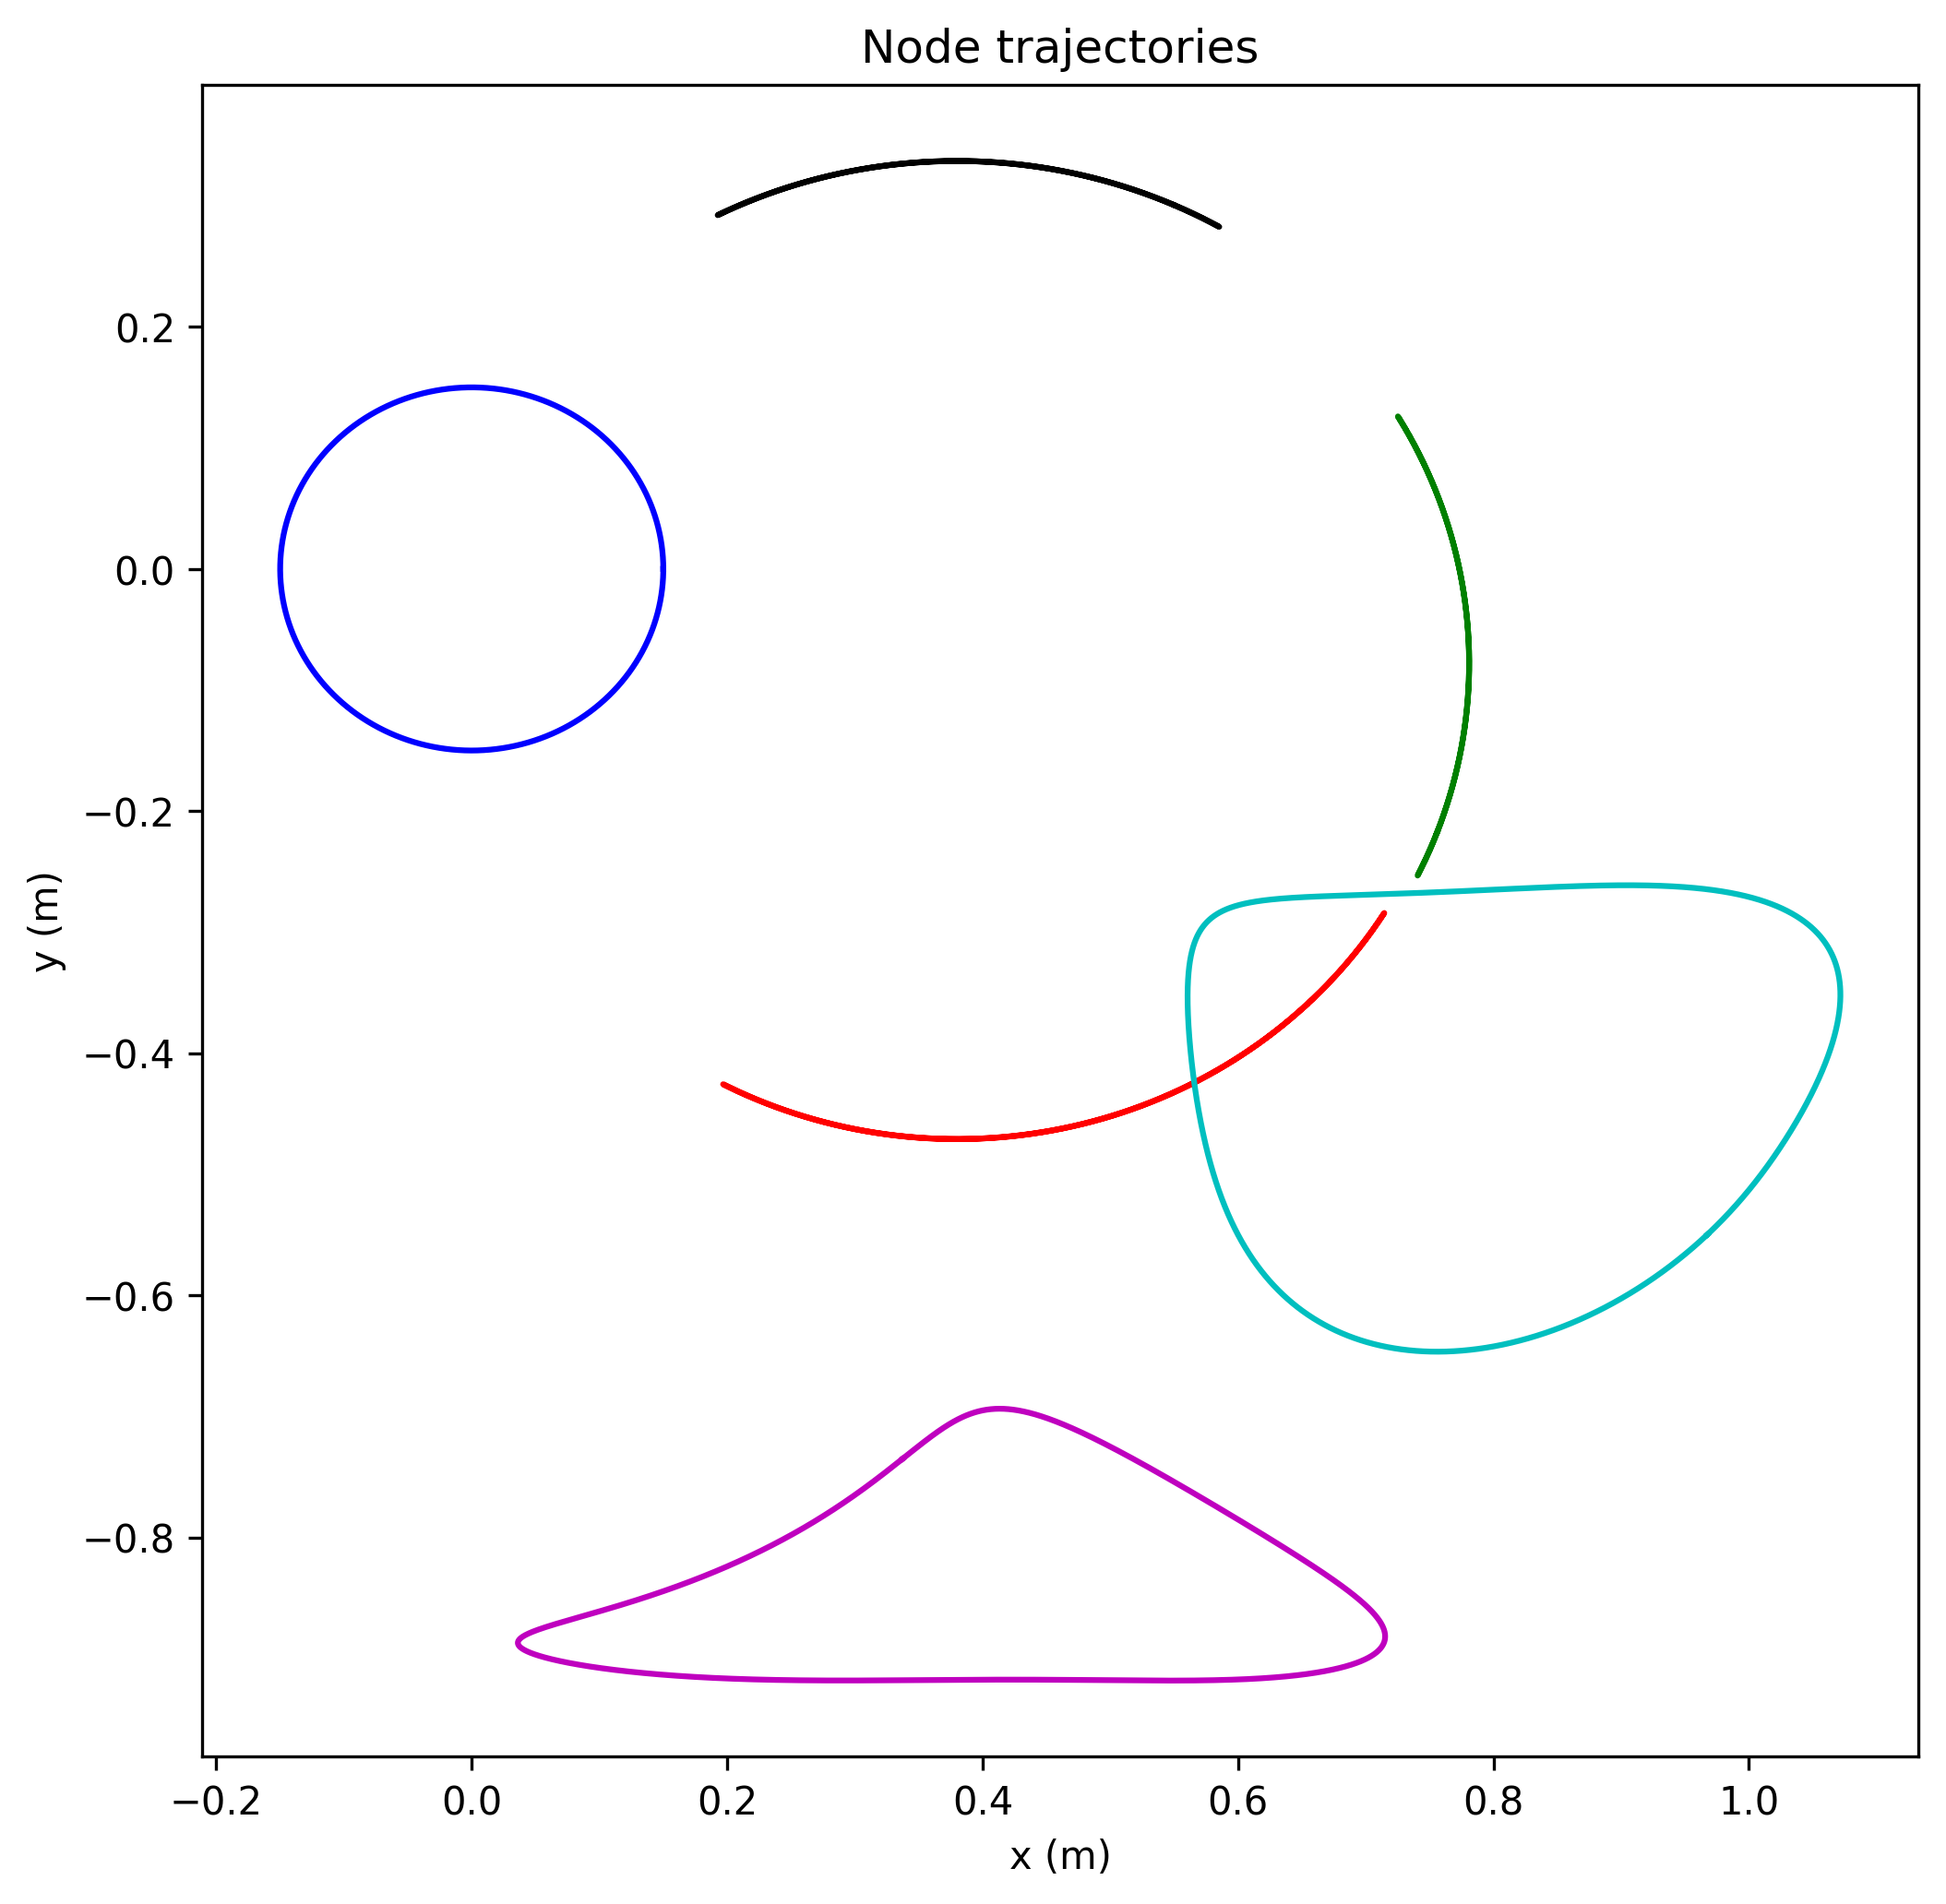

In [10]:
import matplotlib.pyplot as plt
#fig_0, ax_0 = plt.subplots()
#ax_0.plot(n0x,n0y,'b',n1x,n1y,'k',n2x,n2y,'g',n3x,n3y,'r',n4x,n4y,'c',n5x,n5y,'m')
#ax_0.set_xlabel('x')
#ax_0.set_ylabel('y')
#ax_0.set_title('Nodes')
fig_0 = plt.figure(figsize=[8,8],dpi=300)
ax_0 = fig_0.add_subplot()
ax_0.plot(n0x,n0y,'b',n1x,n1y,'k',n2x,n2y,'g',n3x,n3y,'r',n4x,n4y,'c',n5x,n5y,'m')
ax_0.set_xlabel('x (m)')
ax_0.set_ylabel('y (m)')
ax_0.set_title('Node trajectories')
plt.savefig('imgout/4_jansen-node-positions-togther.eps',dpi=600)

This matches the results from Patnaik's research pretty well. The first thing we'll want to do is scale the leg up so that they give the leg height we wanted (given by the minimum value in $y$ of Node 5 minus the position of the motor, here the origin or $0$

In [11]:
# Find smallest value of y for foot
min_n5y = 9999
for i in range(0,steps,1):
    if (n5y[i] < min_n5y):
        min_n5y = n5y[i]
        
# 0.35 is the height of the robot from hip actuator to foot
scaling_factor = 0.35 / abs(min_n5y)

# lengths are in meters, taken from Wiki page on Jansen's linkage and scaled with scaling factor
ell_0 = 0.15 * scaling_factor
ell_1 = 0.5 * scaling_factor
ell_2 = 0.558 * scaling_factor
ell_3 = 0.394 * scaling_factor
ell_4 = 0.657 * scaling_factor
ell_5 = 0.49 * scaling_factor
ell_6 = 0.619 * scaling_factor
ell_7 = 0.367 * scaling_factor
ell_8 = 0.393 * scaling_factor
ell_9 = 0.415 * scaling_factor
ell_10 = 0.401 * scaling_factor
# position of pin, also taken from Wiki page
x_pin = 0.38 * scaling_factor
y_pin = -0.078 * scaling_factor

# Higher number = higher precision
steps = 100000

# Initialize arrays to hold node position values
theta = [None] * steps
n0x = [None] * steps
n0y = [None] * steps
n1x = [None] * steps
n1y = [None] * steps
n2x = [None] * steps
n2y = [None] * steps
n3x = [None] * steps
n3y = [None] * steps
n4x = [None] * steps
n4y = [None] * steps
n5x = [None] * steps
n5y = [None] * steps

for i in range(0, steps, 1):
    theta[i] = 2 * math.pi * (i / steps)
    # NODE 0
    x_0 = ell_0 * math.cos(theta[i])
    y_0 = ell_0 * math.sin(theta[i])
    n0x[i] = x_0
    n0y[i] = y_0
    # NODE 1: take higher value of Y
    [sol1x,sol1y,sol2x,sol2y] = solve_four_bar_linkage_y(ell_0,ell_1,ell_9,x_pin,y_pin,x_0,y_0)
    n1x[i] = sol1x
    n1y[i] = sol1y
    # NODE 2: take larger value of x
    d = x_pin - x_0
    e = y_pin - y_0
    [sol1x,sol1y,sol2x,sol2y] = solve_four_bar_linkage_x(ell_1,ell_2,ell_10,d,e,n1x[i]-x_0,n1y[i]-y_0)
    n2x[i] = sol1x + x_0
    n2y[i] = sol1y + y_0
    # NODE 3: take the smaller value of y
    [sol1x,sol1y,sol2x,sol2y] = solve_four_bar_linkage_y(ell_0,ell_6,ell_8,x_pin,y_pin,x_0,y_0)
    n3x[i] = sol2x
    n3y[i] = sol2y
    # NODE 4: take larger value of x
    d = n3x[i] - x_pin
    e = n3y[i] - y_pin
    [sol1x,sol1y,sol2x,sol2y] = solve_four_bar_linkage_x(ell_10,ell_3,ell_7,d,e,n2x[i]-x_pin,n2y[i]-y_pin)
    n4x[i] = sol1x + x_pin
    n4y[i] = sol1y + y_pin
    # NODE 5: take the smaller value of y
    d = n3x[i] - n2x[i]
    e = n3y[i] - n2y[i]
    [sol1x,sol1y,sol2x,sol2y] = solve_four_bar_linkage_y(ell_3,ell_4,ell_5,d,e,n4x[i]-n2x[i],n4y[i]-n2y[i])
    n5x[i] = sol2x + n2x[i]
    n5y[i] = sol2y + n2y[i]

min_n5y = 9999
for i in range(0,steps,1):
    if (n5y[i] < min_n5y):
        min_n5y = n5y[i]
print('minimum value of Node 5 should be -0.35m:',min_n5y)

minimum value of Node 5 should be -0.35m: -0.35000000000000014


Text(0.5, 1.0, 'Node 5')

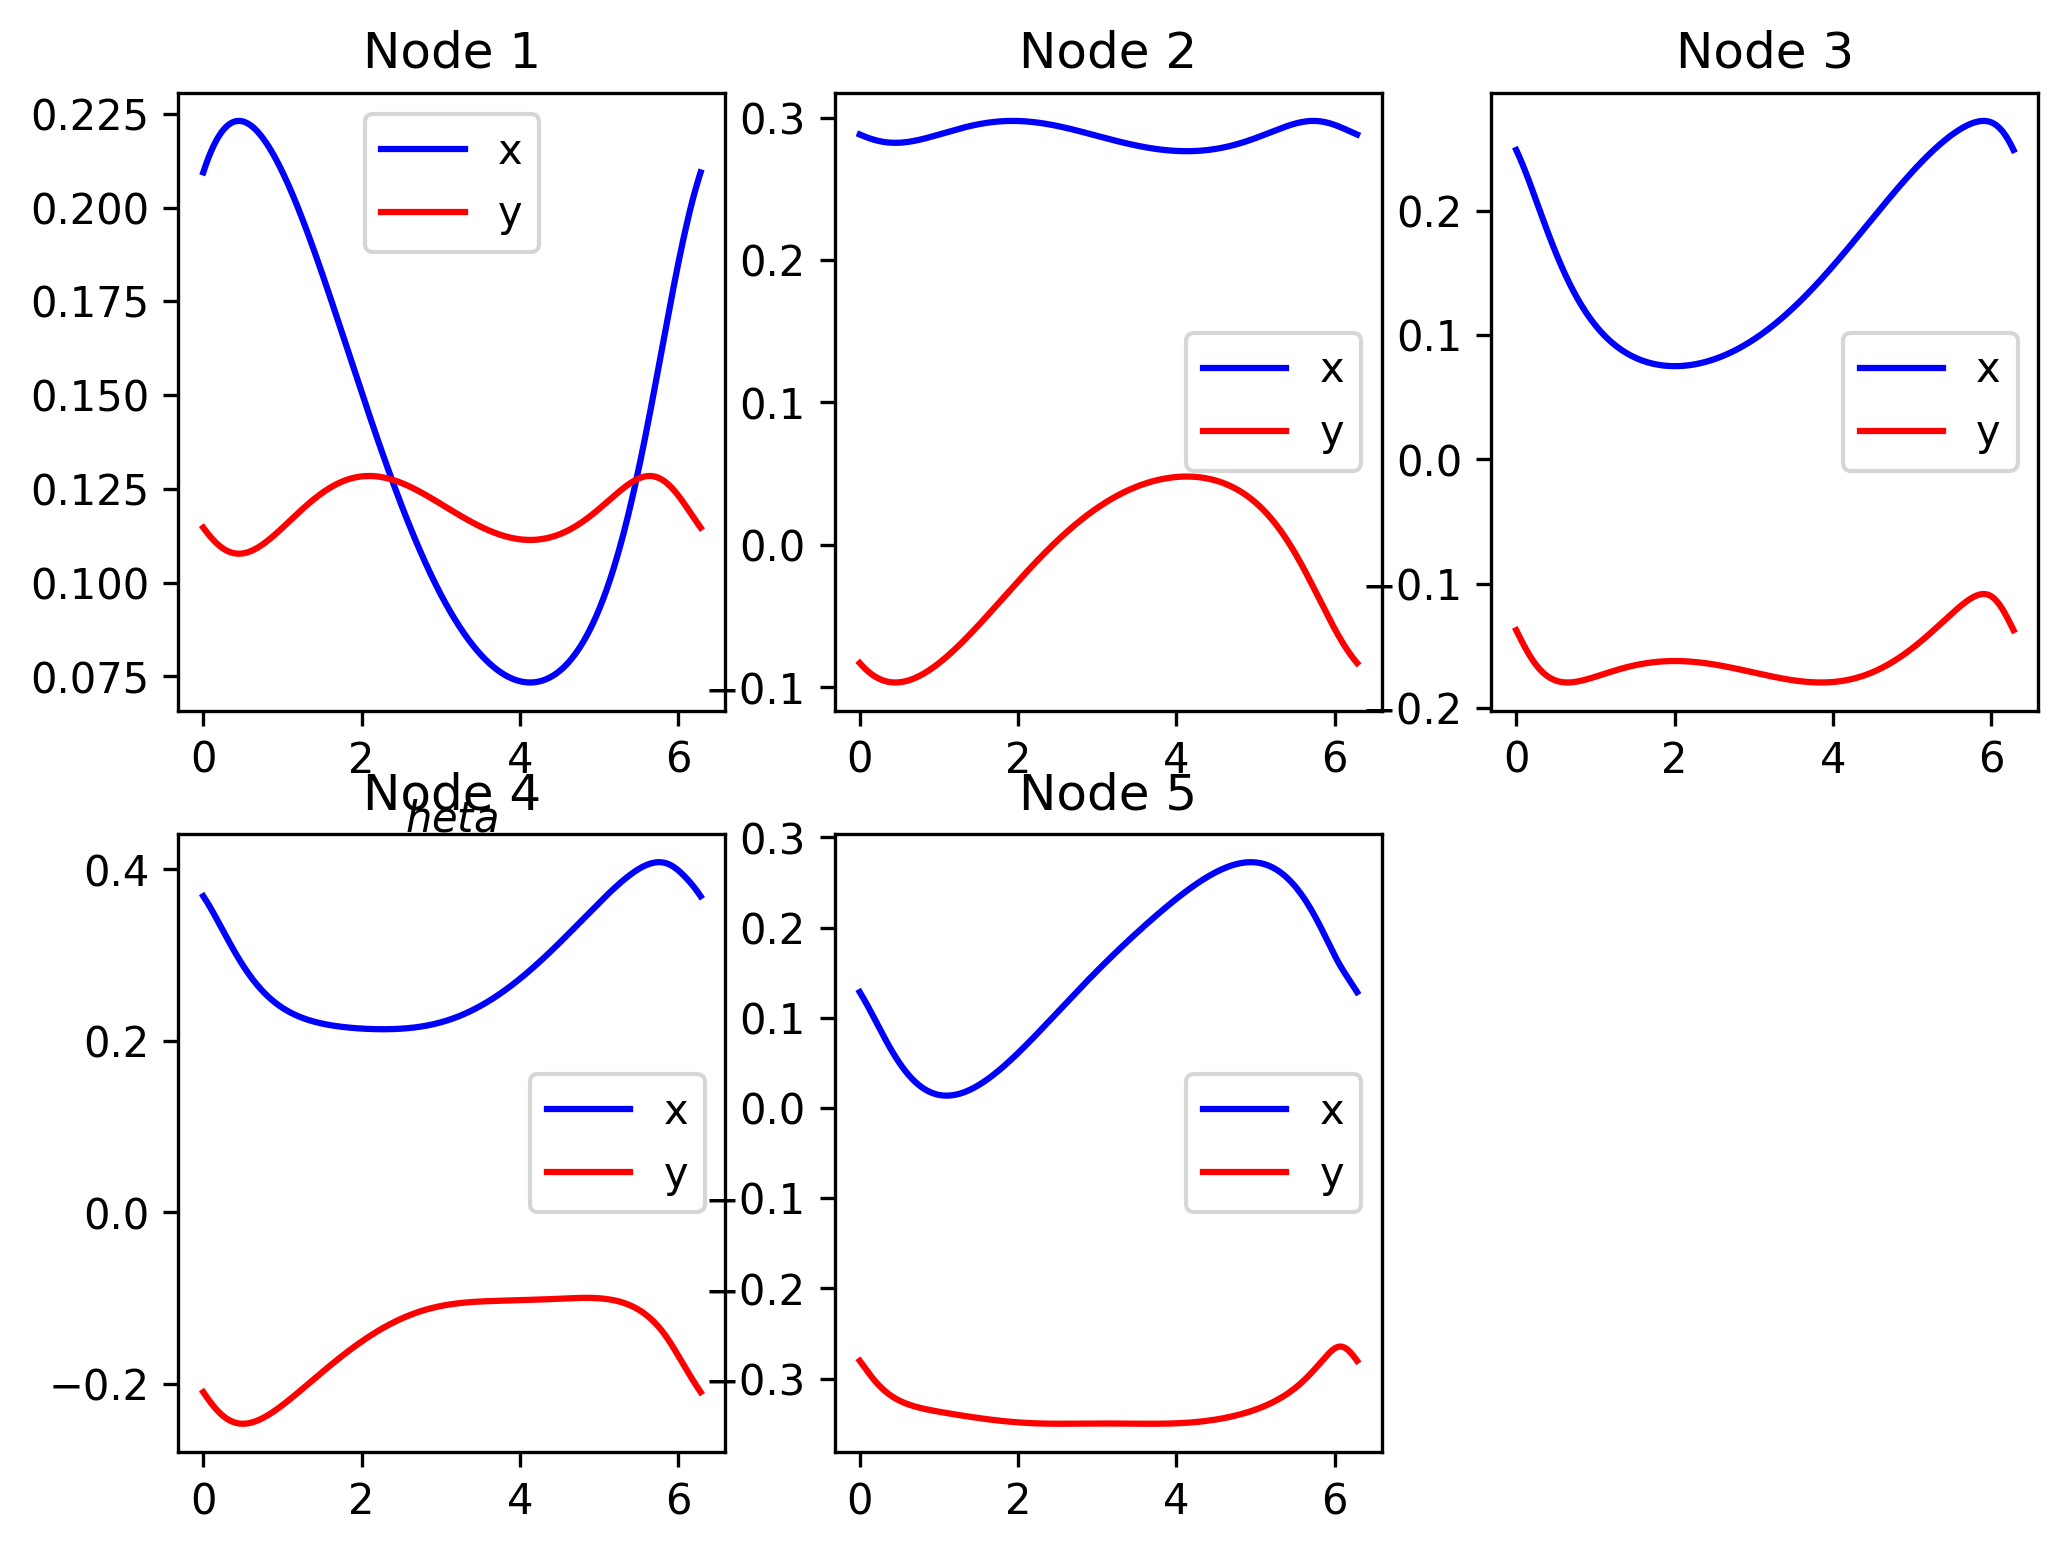

In [63]:
fig_2 = plt.figure(figsize=(8,6), dpi= 300)
ax21 = plt.subplot(231)
ax21.plot(theta,n1x,'b',label='x')
ax21.plot(theta,n1y,'r',label='y')
ax21.set_xlabel('$\theta$')
ax21.legend()
ax21.set_title('Node 1')
ax22 = plt.subplot(232)
ax22.plot(theta,n2x,'b',label='x')
ax22.plot(theta,n2y,'r',label='y')
ax22.legend()
ax22.set_title('Node 2')
ax23 = plt.subplot(233)
ax23.plot(theta,n3x,'b',label='x')
ax23.plot(theta,n3y,'r',label='y')
ax23.legend()
ax23.set_title('Node 3')
ax24 = plt.subplot(234)
ax24.plot(theta,n4x,'b',label='x')
ax24.plot(theta,n4y,'r',label='y')
ax24.legend()
ax24.set_title('Node 4')
ax25 = plt.subplot(235)
ax25.plot(theta,n5x,'b',label='x')
ax25.plot(theta,n5y,'r',label='y')
ax25.legend()
ax25.set_title('Node 5')

In [64]:
display(ell_0)
display(ell_1)
display(ell_2)
display(ell_3)
display(ell_4)
display(ell_5)
display(ell_6)
display(ell_7)
display(ell_8)
display(ell_9)
display(ell_10)
display(x_pin)
display(y_pin)

We'll transform these into relations using curve-fitting

In [12]:
import numpy as np
polydeg = 7

# polynomial fits, returns polynomial coefficients, residuals and unused values a, b and c
# the 3rd argument indicates the max order of the polynomial
# coefficients in the series fn_X are returned in order of greatest to lowest polynome (x^3, x^2, x^1, x^0)
# residual (rNx) returned to determined quality of the fit
f1x,r1x,a,b,c = np.polyfit(theta,n1x,polydeg,full=True)
f1y,r1y,a,b,c = np.polyfit(theta,n1y,polydeg,full=True)
f2x,r2x,a,b,c = np.polyfit(theta,n2x,polydeg,full=True)
f2y,r2y,a,b,c = np.polyfit(theta,n2y,polydeg,full=True)
f3x,r3x,a,b,c = np.polyfit(theta,n3x,polydeg,full=True)
f3y,r3y,a,b,c = np.polyfit(theta,n3y,polydeg,full=True)
f4x,r4x,a,b,c = np.polyfit(theta,n4x,polydeg,full=True)
f4y,r4y,a,b,c = np.polyfit(theta,n4y,polydeg,full=True)
f5x,r5x,a,b,c = np.polyfit(theta,n5x,polydeg,full=True)
f5y,r5y,a,b,c = np.polyfit(theta,n5y,polydeg,full=True)
#display(r1x)
#display(r1y)
#display(r2x)
#display(r2y)
#display(r3x)
#display(r3y)
#display(r4x)
#display(r4y)
#display(r5x)
#display(r5y)

# poly1d version of each
p1x = np.poly1d(f1x)
p1y = np.poly1d(f1y)
p2x = np.poly1d(f2x)
p2y = np.poly1d(f2y)
p3x = np.poly1d(f3x)
p3y = np.poly1d(f3y)
p4x = np.poly1d(f4x)
p4y = np.poly1d(f4y)
p5x = np.poly1d(f5x)
p5y = np.poly1d(f5y)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

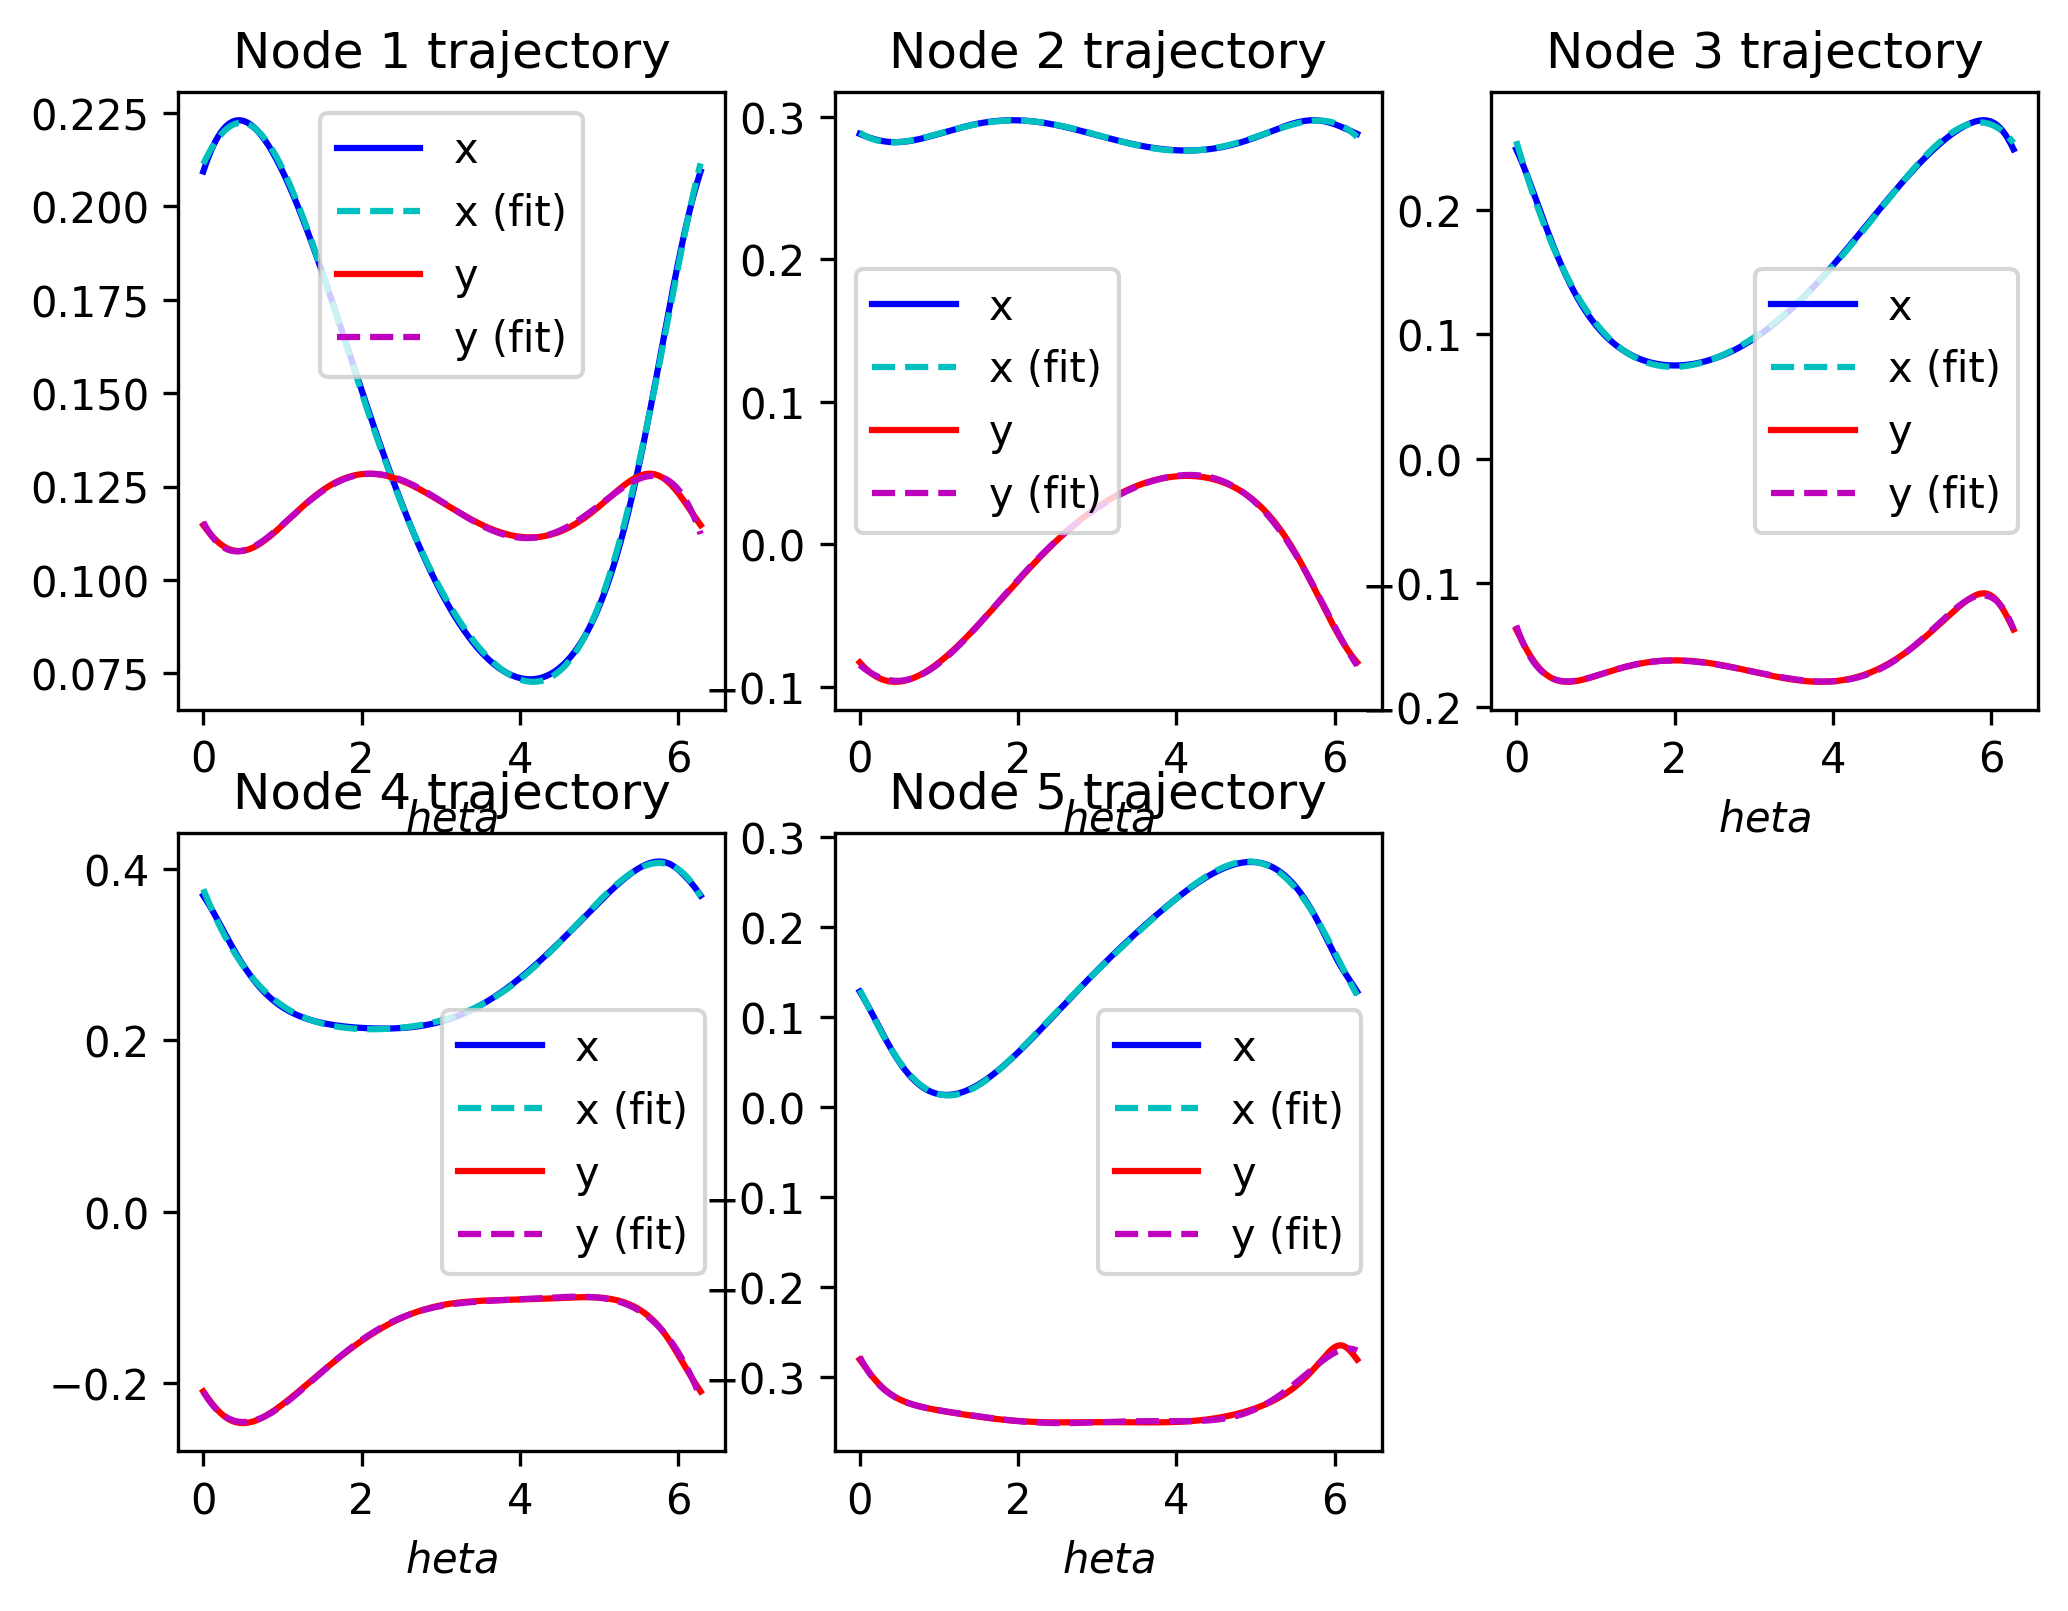

In [69]:
# Plot to compare
fig3 = plt.figure(figsize=(8,6), dpi= 300)
a3_1 = plt.subplot(231)
a3_1.plot(theta,n1x,'b',label='x')
a3_1.plot(theta,p1x(np.asarray(theta)),'c--',label='x (fit)')
a3_1.plot(theta,n1y,'r',label='y')
a3_1.plot(theta,p1y(np.asarray(theta)),'m--',label='y (fit)')
a3_1.legend()
a3_1.set_xlabel('$\theta$')
a3_1.set_title('Node 1 trajectory')
a3_2 = plt.subplot(232)
a3_2.plot(theta,n2x,'b',label='x')
a3_2.plot(theta,p2x(np.asarray(theta)),'c--',label='x (fit)')
a3_2.plot(theta,n2y,'r',label='y')
a3_2.plot(theta,p2y(np.asarray(theta)),'m--',label='y (fit)')
a3_2.legend()
a3_2.set_xlabel('$\theta$')
a3_2.set_title('Node 2 trajectory')
a3_3 = plt.subplot(233)
a3_3.plot(theta,n3x,'b',label='x')
a3_3.plot(theta,p3x(np.asarray(theta)),'c--',label='x (fit)')
a3_3.plot(theta,n3y,'r',label='y')
a3_3.plot(theta,p3y(np.asarray(theta)),'m--',label='y (fit)')
a3_3.legend()
a3_3.set_xlabel('$\theta$')
a3_3.set_title('Node 3 trajectory')
a3_4 = plt.subplot(234)
a3_4.plot(theta,n4x,'b',label='x')
a3_4.plot(theta,p4x(np.asarray(theta)),'c--',label='x (fit)')
a3_4.plot(theta,n4y,'r',label='y')
a3_4.plot(theta,p4y(np.asarray(theta)),'m--',label='y (fit)')
a3_4.legend()
a3_4.set_xlabel('$\theta$')
a3_4.set_title('Node 4 trajectory')
a3_5 = plt.subplot(235)
a3_5.plot(theta,n5x,'b',label='x')
a3_5.plot(theta,p5x(np.asarray(theta)),'c--',label='x (fit)')
a3_5.plot(theta,n5y,'r',label='y')
a3_5.plot(theta,p5y(np.asarray(theta)),'m--',label='y (fit)')
a3_5.legend()
a3_5.set_xlabel('$\theta$')
a3_5.set_title('Node 5 trajectory')
plt.savefig('imgout/4_node-positions-fct-of-theta.eps',dpi=600)

A more or less perfect fit! I'm making the executive decision that 7th degree polynomials are enough; anything more would get ridiculously long. Now that we have equations for the position of each node as a function of theta, we can develop the Jacobian, then the dynamic model.

In [13]:
import sympy as sp

theta = sp.symbols('theta') # theta is crank angle
x0,x1,x2,x3,x4,x5 = sp.symbols('x0 x1 x2 x3 x4 x5')
y0,y1,y2,y3,y4,y5 = sp.symbols('y0 y1 y2 y3 y4 y5')

x0 = ell_0 * sp.cos(theta)
y0 = ell_0 * sp.sin(theta)
x1 = (f1x[0] * theta**7) + (f1x[1] * theta**6) + (f1x[2] * theta**5) + (f1x[3] * theta**4) + (f1x[4] * theta**3) + (f1x[5] * theta**2) + (f1x[6] * theta**1) + (f1x[7] * theta**0)
y1 = (f1y[0] * theta**7) + (f1y[1] * theta**6) + (f1y[2] * theta**5) + (f1y[3] * theta**4) + (f1y[4] * theta**3) + (f1y[5] * theta**2) + (f1y[6] * theta**1) + (f1y[7] * theta**0)
x2 = (f2x[0] * theta**7) + (f2x[1] * theta**6) + (f2x[2] * theta**5) + (f2x[3] * theta**4) + (f2x[4] * theta**3) + (f2x[5] * theta**2) + (f2x[6] * theta**1) + (f2x[7] * theta**0)
y2 = (f2y[0] * theta**7) + (f2y[1] * theta**6) + (f2y[2] * theta**5) + (f2y[3] * theta**4) + (f2y[4] * theta**3) + (f2y[5] * theta**2) + (f2y[6] * theta**1) + (f2y[7] * theta**0)
x3 = (f3x[0] * theta**7) + (f3x[1] * theta**6) + (f3x[2] * theta**5) + (f3x[3] * theta**4) + (f3x[4] * theta**3) + (f3x[5] * theta**2) + (f3x[6] * theta**1) + (f3x[7] * theta**0)
y3 = (f3y[0] * theta**7) + (f3y[1] * theta**6) + (f3y[2] * theta**5) + (f3y[3] * theta**4) + (f3y[4] * theta**3) + (f3y[5] * theta**2) + (f3y[6] * theta**1) + (f3y[7] * theta**0)
x4 = (f4x[0] * theta**7) + (f4x[1] * theta**6) + (f4x[2] * theta**5) + (f4x[3] * theta**4) + (f4x[4] * theta**3) + (f4x[5] * theta**2) + (f4x[6] * theta**1) + (f4x[7] * theta**0)
y4 = (f4y[0] * theta**7) + (f4y[1] * theta**6) + (f4y[2] * theta**5) + (f4y[3] * theta**4) + (f4y[4] * theta**3) + (f4y[5] * theta**2) + (f4y[6] * theta**1) + (f4y[7] * theta**0)
x5 = (f5x[0] * theta**7) + (f5x[1] * theta**6) + (f5x[2] * theta**5) + (f5x[3] * theta**4) + (f5x[4] * theta**3) + (f5x[5] * theta**2) + (f5x[6] * theta**1) + (f5x[7] * theta**0)
y5 = (f5y[0] * theta**7) + (f5y[1] * theta**6) + (f5y[2] * theta**5) + (f5y[3] * theta**4) + (f5y[4] * theta**3) + (f5y[5] * theta**2) + (f5y[6] * theta**1) + (f5y[7] * theta**0)

# get derivatives for simulation
x0_dot = x0.diff(theta)
y0_dot = y0.diff(theta)
x1_dot = x1.diff(theta)
y1_dot = y1.diff(theta)
x2_dot = x2.diff(theta)
y2_dot = y2.diff(theta)
x3_dot = x3.diff(theta)
y3_dot = y3.diff(theta)
x4_dot = x4.diff(theta)
y4_dot = y4.diff(theta)
x5_dot = x5.diff(theta)
y5_dot = y5.diff(theta)
# second derivatives
x0_ddot = x0.diff(theta)
y0_ddot = y0.diff(theta)
x1_ddot = x1.diff(theta)
y1_ddot = y1.diff(theta)
x2_ddot = x2.diff(theta)
y2_ddot = y2.diff(theta)
x3_ddot = x3.diff(theta)
y3_ddot = y3.diff(theta)
x4_ddot = x4.diff(theta)
y4_ddot = y4.diff(theta)
x5_ddot = x5.diff(theta)
y5_ddot = y5.diff(theta)


print(sp.python(x0))
print(sp.python(y0))
print(sp.python(x1))
print(sp.python(y1))
print(sp.python(x2))
print(sp.python(y2))
print(sp.python(x3))
print(sp.python(y3))
print(sp.python(x4))
print(sp.python(y4))
print(sp.python(x5))
print(sp.python(y5))
"""
print('--------------------------')
print(sp.python(x0_dot))
print(sp.python(y0_dot))
print(sp.python(x1_dot))
print(sp.python(y1_dot))
print(sp.python(x2_dot))
print(sp.python(y2_dot))
print(sp.python(x3_dot))
print(sp.python(y3_dot))
print(sp.python(x4_dot))
print(sp.python(y4_dot))
print(sp.python(x5_dot))
print(sp.python(y5_dot))
print('--------------------------')
print(sp.python(x0_ddot))
print(sp.python(y0_ddot))
print(sp.python(x1_ddot))
print(sp.python(y1_ddot))
print(sp.python(x2_ddot))
print(sp.python(y2_ddot))
print(sp.python(x3_ddot))
print(sp.python(y3_ddot))
print(sp.python(x4_ddot))
print(sp.python(y4_ddot))
print(sp.python(x5_ddot))
print(sp.python(y5_ddot))
"""
"""
print(sp.latex(x0))
print(sp.latex(y0))
print(sp.latex(x1))
print(sp.latex(y1))
print(sp.latex(x2))
print(sp.latex(y2))
print(sp.latex(x3))
print(sp.latex(y3))
print(sp.latex(x4))
print(sp.latex(y4))
print(sp.latex(x5))
print(sp.latex(y5))
"""

theta = Symbol('theta')
e = Float('0.057168439518905365', precision=53)*cos(theta)
theta = Symbol('theta')
e = Float('0.057168439518905365', precision=53)*sin(theta)
theta = Symbol('theta')
e = -Float('3.9444093759977156e-5', precision=53)*theta**7 + Float('0.00079651887729376028', precision=53)*theta**6 - Float('0.0060982936002913785', precision=53)*theta**5 + Float('0.021142731056925997', precision=53)*theta**4 - Float('0.02318575947860551', precision=53)*theta**3 - Float('0.038591424819869651', precision=53)*theta**2 + Float('0.044786929093735252', precision=53)*theta + Float('0.21136233094291412', precision=53)
theta = Symbol('theta')
e = Float('9.7696232078669311e-7', precision=53)*theta**7 - Float('1.8729927370066667e-5', precision=53)*theta**6 - Float('0.00026445111392442845', precision=53)*theta**5 + Float('0.0057094233361158426', precision=53)*theta**4 - Float('0.032045978719843708', precision=53)*theta**3 + Float('0.067754275638143499', precision=53)*theta**2 - Float('0.04185

'\nprint(sp.latex(x0))\nprint(sp.latex(y0))\nprint(sp.latex(x1))\nprint(sp.latex(y1))\nprint(sp.latex(x2))\nprint(sp.latex(y2))\nprint(sp.latex(x3))\nprint(sp.latex(y3))\nprint(sp.latex(x4))\nprint(sp.latex(y4))\nprint(sp.latex(x5))\nprint(sp.latex(y5))\n'

### Linear Jacobian

As seen in the 3-DoF series-articulated model, the Jacobian can be calculated as

$$
v = J_v\dot{\theta}
$$

All terms of the jacobian can be found using the following relationship:

$$
J_{v_{jk}} = \frac{\partial f_j}{\partial q_k}
$$

We can thus calculate the jacobian for each node

In [14]:
j0 = sp.Matrix([[x0.diff(theta)],
            [y0.diff(theta)]])
j1 = sp.Matrix([[x1.diff(theta)],
            [y1.diff(theta)]])
j2 = sp.Matrix([[x2.diff(theta)],
            [y2.diff(theta)]])
j3 = sp.Matrix([[x3.diff(theta)],
          [y3.diff(theta)]])
j4 = sp.Matrix([[x4.diff(theta)],
            [y4.diff(theta)]])
j5 = sp.Matrix([[x5.diff(theta)],
            [y5.diff(theta)]])

#print(j1)

## Dynamic Model

We once more have the equations

$$
M(q) = \sum_i J_{v_i}^T m_i J_{v_i} + J_{\omega_i}^T \mathcal{I}_i J_{\omega_i}
$$

$$
C(q,\dot{q}) = \sum_i J_{v_i}^T m_i \dot{J_{v_i}} + J_{\omega_i}^T \mathcal{I}_i \dot{J_{\omega_i}} - J_{\omega_i}^T \left( \mathcal{I}_i J_{\omega_i} \dot{q} \right) \times J_{\omega_i}
$$

$$
p = \sum_i m_i g h_i
$$

$$
F = \sum_i J_{v_i}^T f_i + J_{\omega_i}^T \tau_i
$$

$$
\tau = \begin{bmatrix}
\tau_1\\
\end{bmatrix}
$$

In [15]:
# all masses are located at the distal tip of their links.
# this means some links have combined masses
m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10 = sp.symbols('m0 m1 m2 m3 m4 m5 m6 m7 m8 m9 m10')
M = ((j0.T*m0*j0) + (j1.T*(m1+m9)*j1) + (j2.T*(m2+m10)*j2) +
             (j3.T*(m6+m8)*j3) + (j4.T*(m3+m7)*j4) + (j5.T*(m4+m5)*j5))
#print(sp.python(M))

In [16]:
t = sp.symbols('t')
theta_t = sp.Function('theta_t')(t)
j0_t = j0.subs([(theta,theta_t)])
j1_t = j1.subs([(theta,theta_t)])
j2_t = j2.subs([(theta,theta_t)])
j3_t = j3.subs([(theta,theta_t)])
j4_t = j4.subs([(theta,theta_t)])
j5_t = j5.subs([(theta,theta_t)])
j0_dot = j0_t.diff(t)
j1_dot = j1_t.diff(t)
j2_dot = j2_t.diff(t)
j3_dot = j3_t.diff(t)
j4_dot = j4_t.diff(t)
j5_dot = j5_t.diff(t)
C = ((j0_t.T*m0*j0_dot) + (j1_t.T*(m1+m9)*j1_dot) + (j2_t.T*(m2+m10)*j2_dot) +
             (j3_t.T*(m6+m8)*j3_dot) + (j4_t.T*(m3+m7)*j4_dot) +
     (j5_t.T*(m4+m5)*j5_dot))
#print(sp.python(C))

In [17]:
g = sp.symbols('g')
p = (m0*y0) + ((m1+m9)*y1) + ((m2+m10)*y2) + ((m6+m8)*y3) + ((m3+m7)*y4) + ((m4+m5)*y5)
# since y is oriented from foot to hip, potential energy is negative
# when moving from hip to foot (since it's below y), this is negative
g = (p.diff(theta))
g_vect = sp.Matrix([[-g]])
#display(g_vect)
#print(sp.python(g_vect))

In [18]:
m_torso,m_total = sp.symbols('m_torso m_total')
m_total = m_torso + m0 + m1 + m2 + m3 + m4 + m5 + m6 + m7 + m8 + m9 + m10
# Since y is pointing from the foot to the hip, and this is also the
# direction of the ground contact force, this is positive
f_5 = (sp.Matrix([[0],
                  [m_total * g]]))
F = j5.T * f_5
#display(F)
#print(sp.python(F))

from the graph, we can see that between the min and max indexes is the phase (or rather, approximately the contact phase since the ends do not make contact).

## Simulation

The external file `jansen-simulation.py` is responsible for simulating the jansen mechanism. The output data is stored in various .csv files that we can analyse here. Below are some basic graphs

(100000, 11)
Max torque:  3.1609625896662137
Found at:  87655
Max inertia_forces:  0.12660386521874512
Max nonlin_forces:  2.7080685321499116
Max gravity_forces:  0.4528940575163022
Max contact_forces:  0.0
Acceleration at max:  0.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


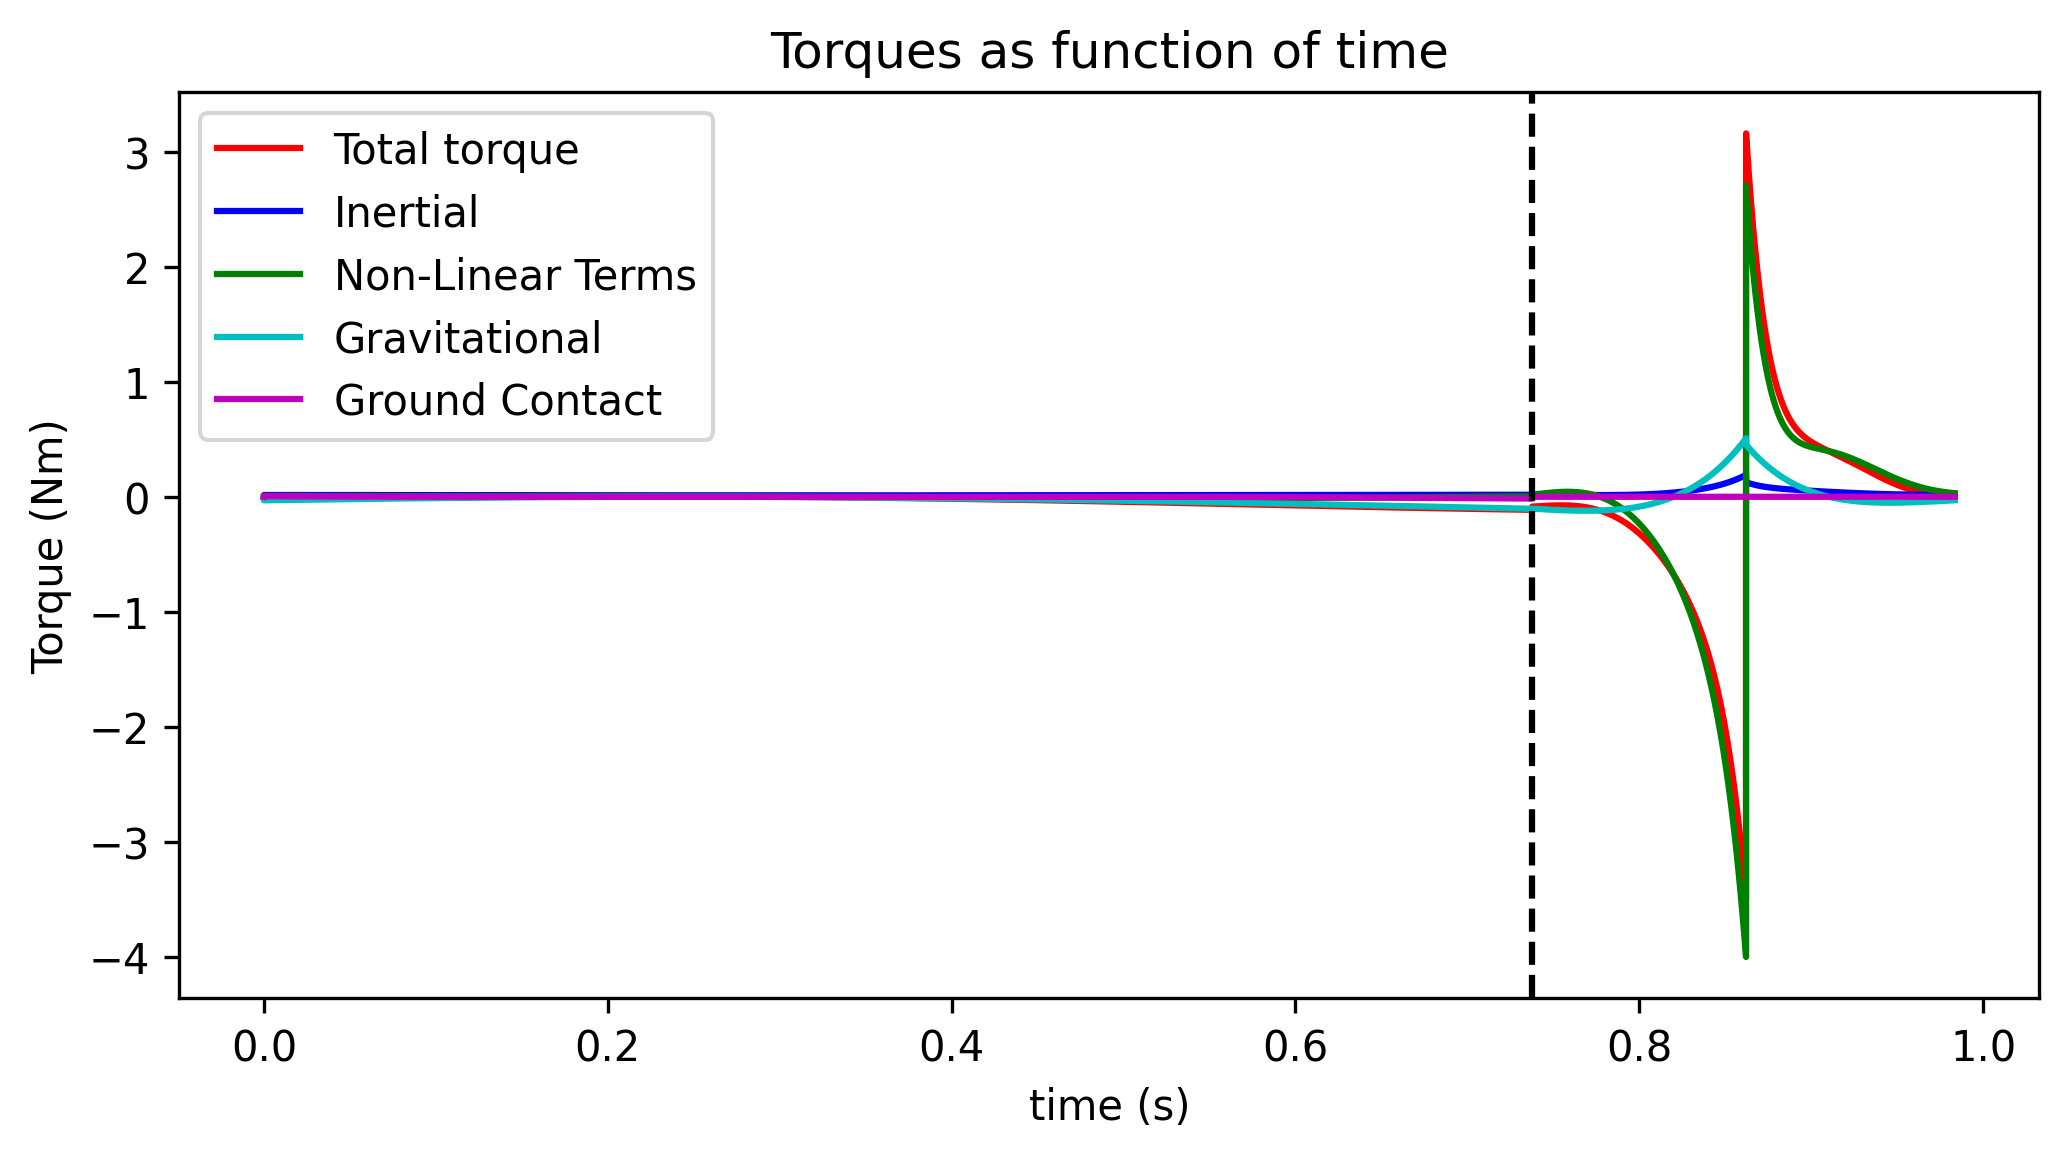

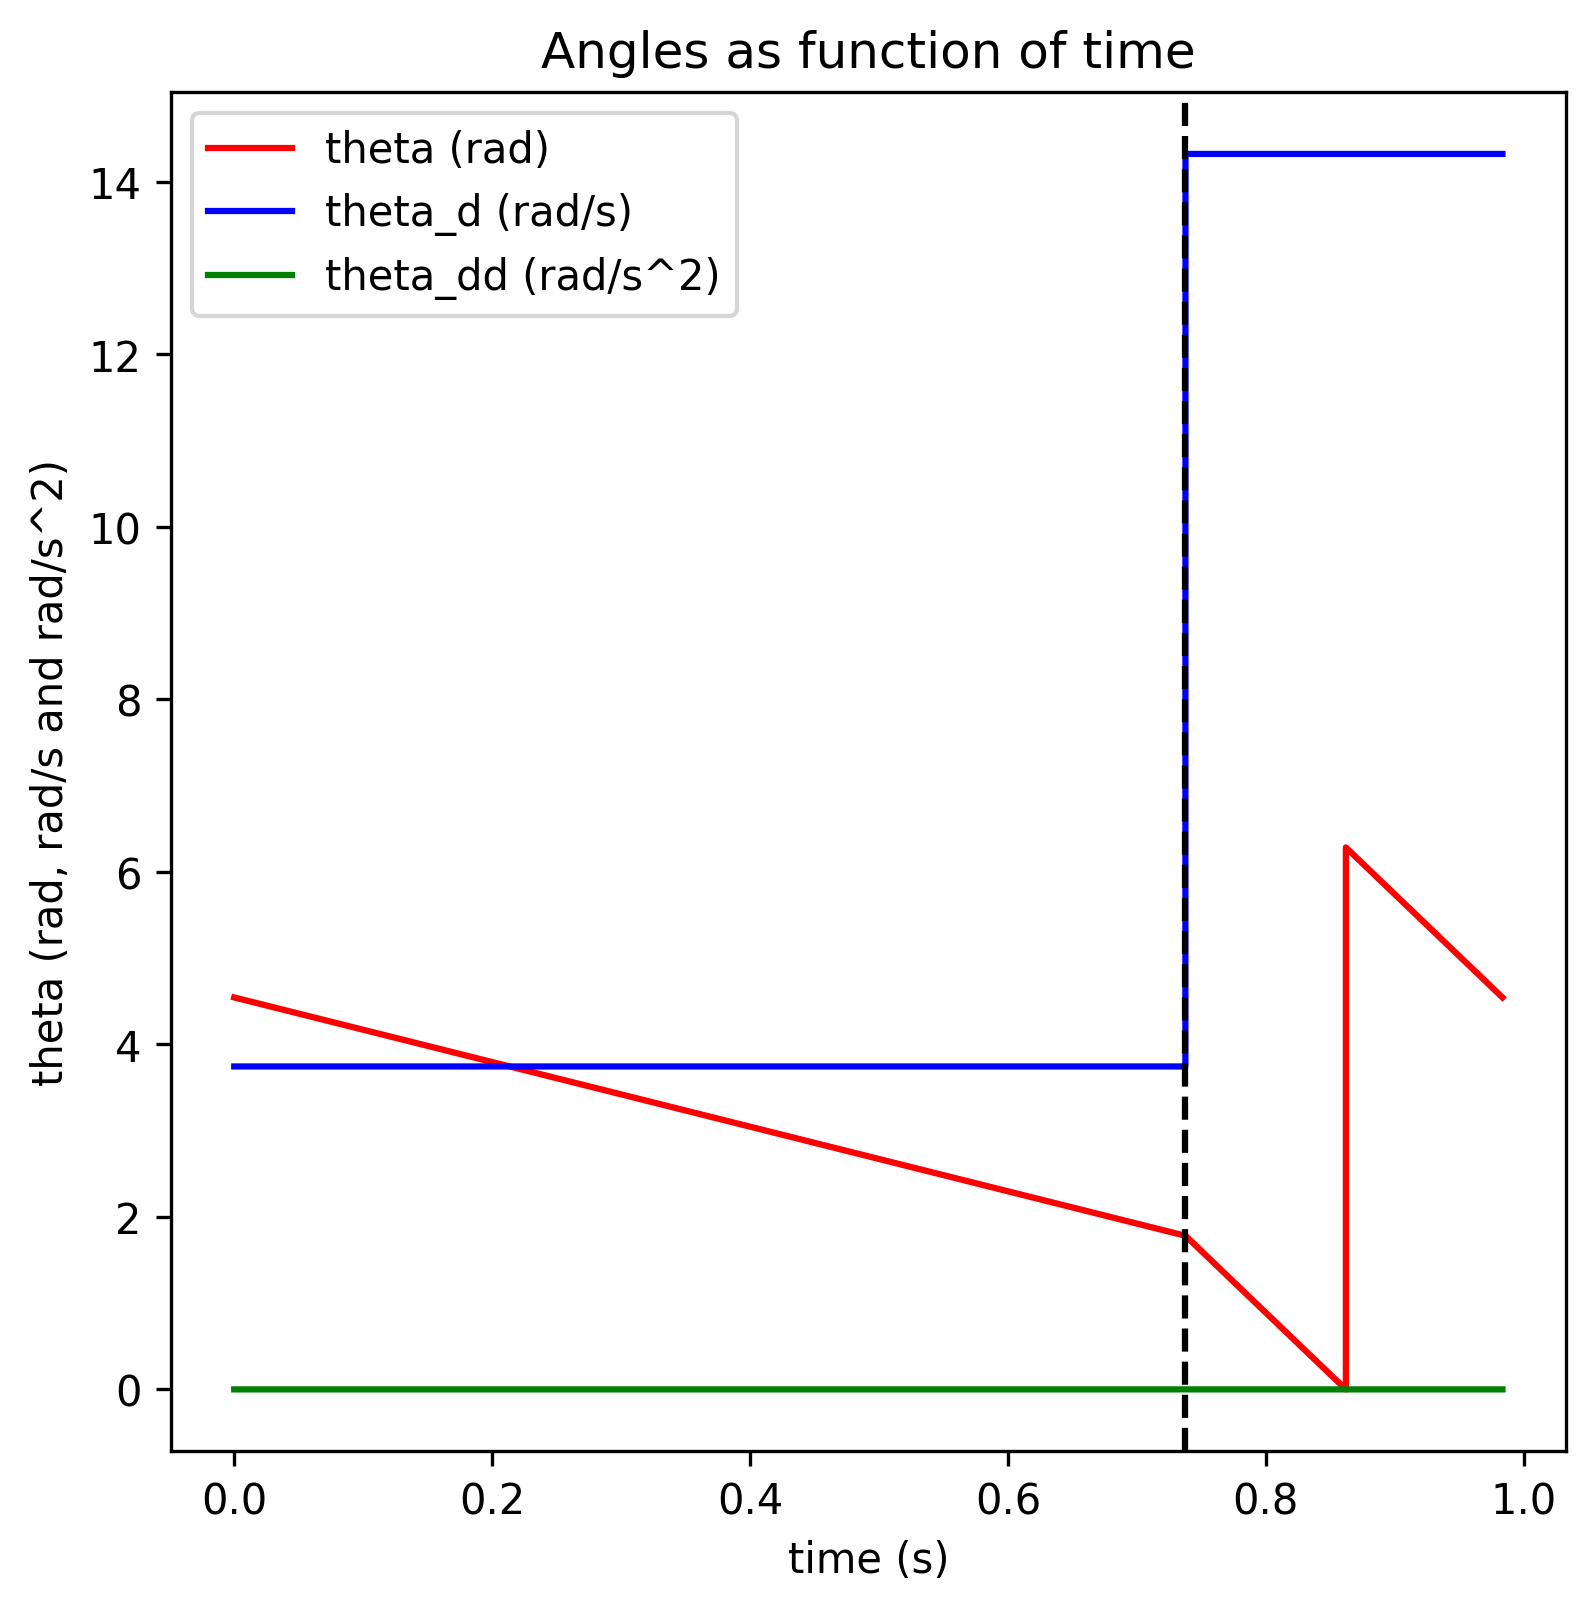

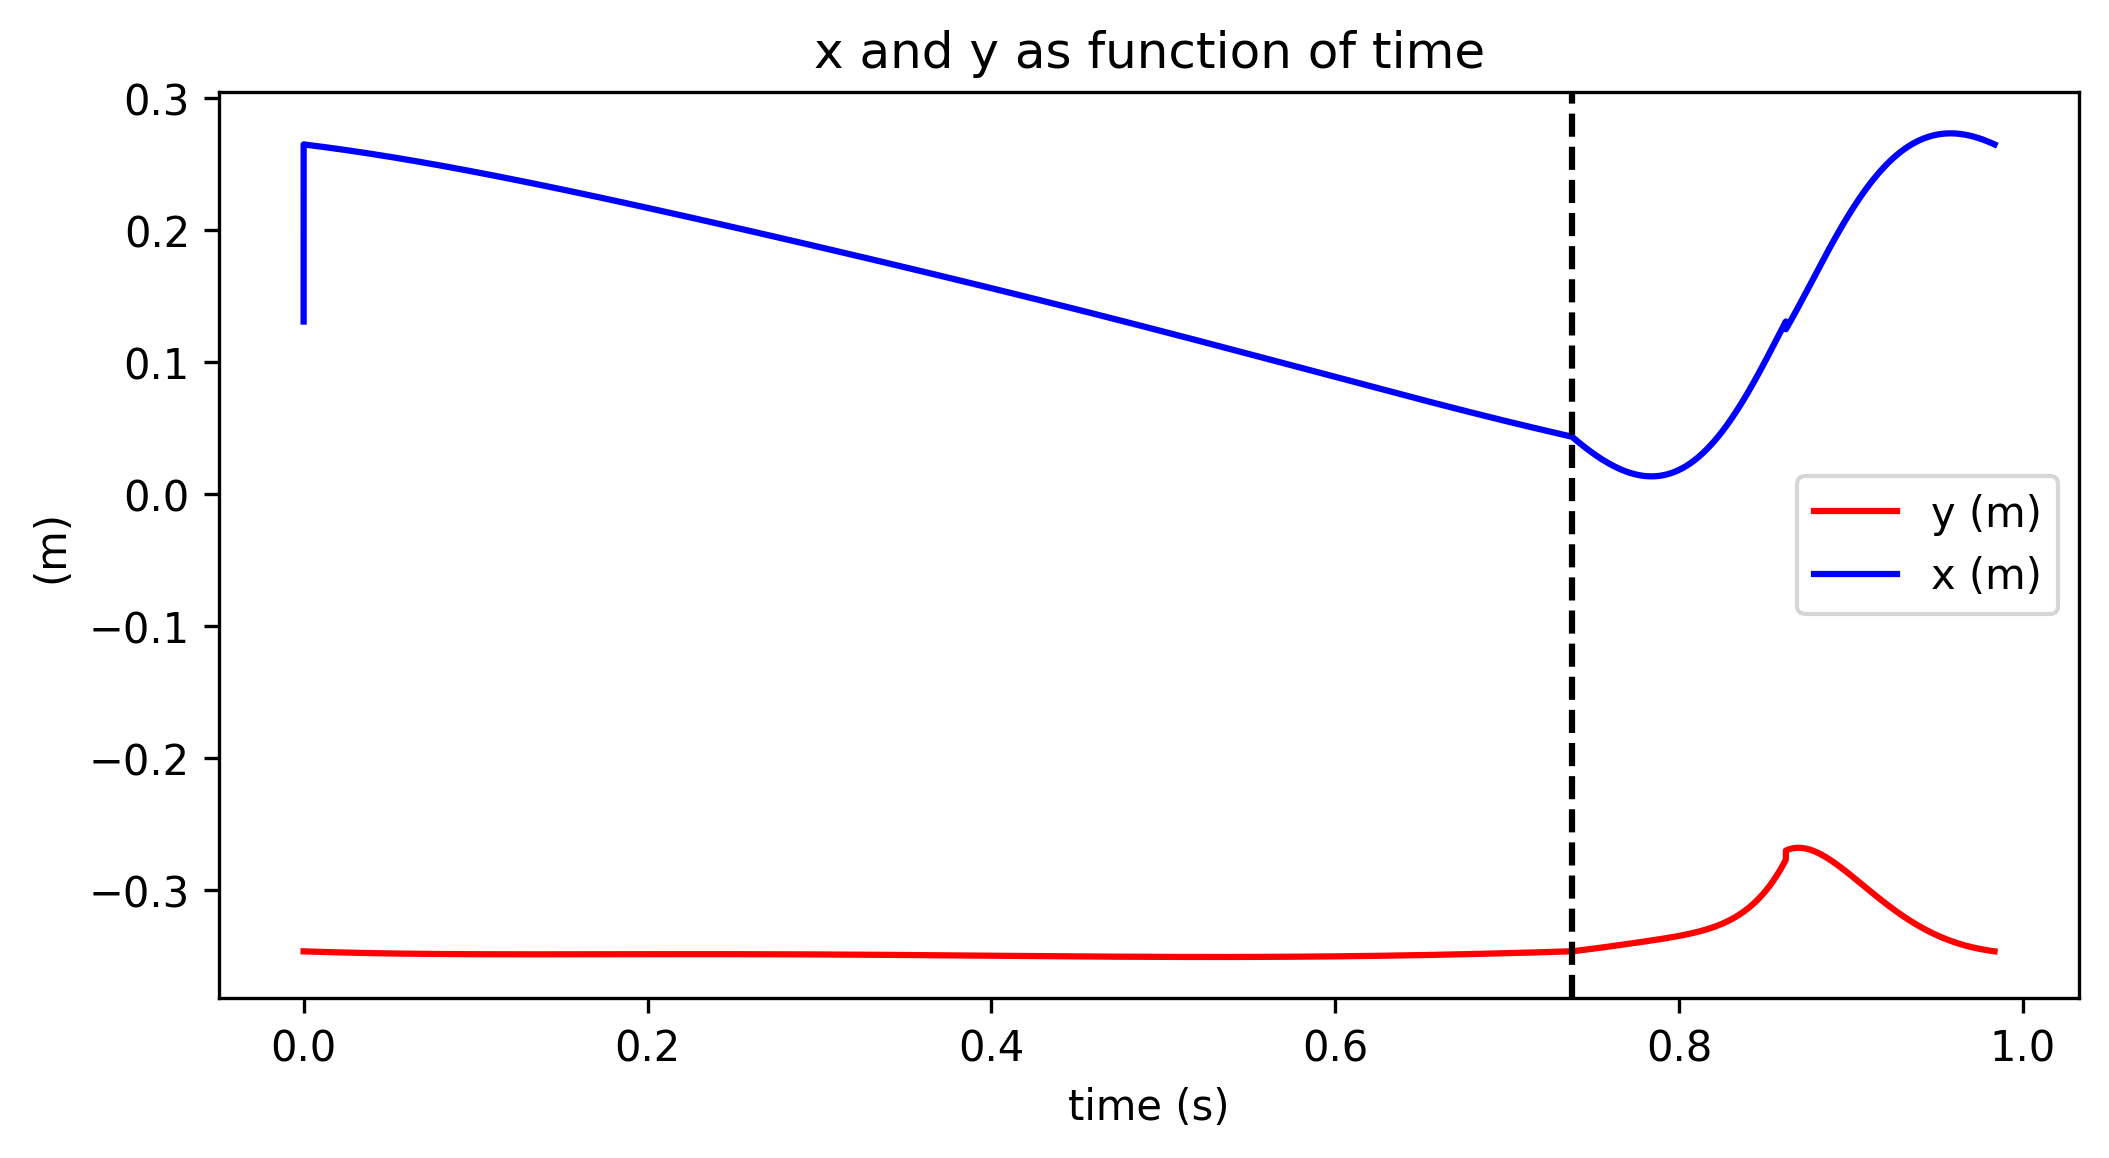

In [21]:
sim_data = np.loadtxt('jansen_simulation.csv')
print(sim_data.shape)
timings = sim_data[:,0] # first column
thetas = sim_data[:,1]
thetas_d = sim_data[:,2]
thetas_dd = sim_data[:,3]
x = sim_data[:,4]
y = sim_data[:,5]
torques = sim_data[:,6] # second column
inertia_forces = sim_data[:,7]
nonlin_forces  = sim_data[:,8]
gravity_forces = sim_data[:,9]
contact_forces = sim_data[:,10]

max_torque = np.amax(torques)
max_torque_index = np.where(torques == max_torque)
index = max_torque_index[0][0]
print('Max torque: ',max_torque)
print('Found at: ',index)
print('Max inertia_forces: ',inertia_forces[index])
print('Max nonlin_forces: ',nonlin_forces[index])
print('Max gravity_forces: ',gravity_forces[index])
print('Max contact_forces: ',contact_forces[index])
print('Acceleration at max: ',thetas_dd[index])

## IMPORTANT! In the graphs below

fig_torque = plt.figure(figsize=[8,4],dpi=300)
ax_torque = fig_torque.add_subplot()
ax_torque.plot(timings,torques,'r',label='Total torque')
ax_torque.plot(timings,inertia_forces,'b',label='Inertial')
ax_torque.plot(timings,nonlin_forces,'g',label='Non-Linear Terms')
ax_torque.plot(timings,gravity_forces,'c',label='Gravitational')
ax_torque.plot(timings,contact_forces,'m',label='Ground Contact')
ax_torque.axvline(x=timings[74999],color='k',linestyle='--') # foot comes off ground, no ground contact forces
ax_torque.legend()
ax_torque.set_xlabel('time (s)')
ax_torque.set_ylabel('Torque (Nm)')
ax_torque.set_title('Torques as function of time')
plt.savefig('imgout/5_jansen-torques.eps',dpi=600)


fig_angles = plt.figure(figsize=[6,6],dpi=300)
ax_angles = fig_angles.add_subplot()
ax_angles.plot(timings,thetas,'r',label='theta (rad)')
ax_angles.plot(timings,thetas_d,'b',label='theta_d (rad/s)')
ax_angles.plot(timings,thetas_dd,'g',label='theta_dd (rad/s^2)')
ax_angles.axvline(x=timings[74999],color='k',linestyle='--') # foot comes off ground, no ground contact forces
ax_angles.legend()
ax_angles.set_xlabel('time (s)')
ax_angles.set_ylabel('theta (rad, rad/s and rad/s^2)')
ax_angles.set_title('Angles as function of time')
plt.savefig('imgout/5_jansen-angles.eps',dpi=600)

fig_y = plt.figure(figsize=[8,4],dpi=300)
ax_y = fig_y.add_subplot()
ax_y.plot(timings,y,'r',label='y (m)')
ax_y.plot(timings,x,'b',label='x (m)')
ax_y.axvline(x=timings[74999],color='k',linestyle='--') # foot comes off ground, no ground contact forces
ax_y.legend()
ax_y.set_xlabel('time (s)')
ax_y.set_ylabel('(m)')
ax_y.set_title('x and y as function of time')
plt.savefig('imgout/5_jansen-xy.eps',dpi=600)

(100000, 7)
[ 0.         19.73860239 19.73863273 19.73866312 19.73869355 19.73872403]
Max torque:  438194.8661778187
Found at:  36520
Acceleration at max:  -761404.417200962


Text(0.5, 1.0, 'x and y as function of time')

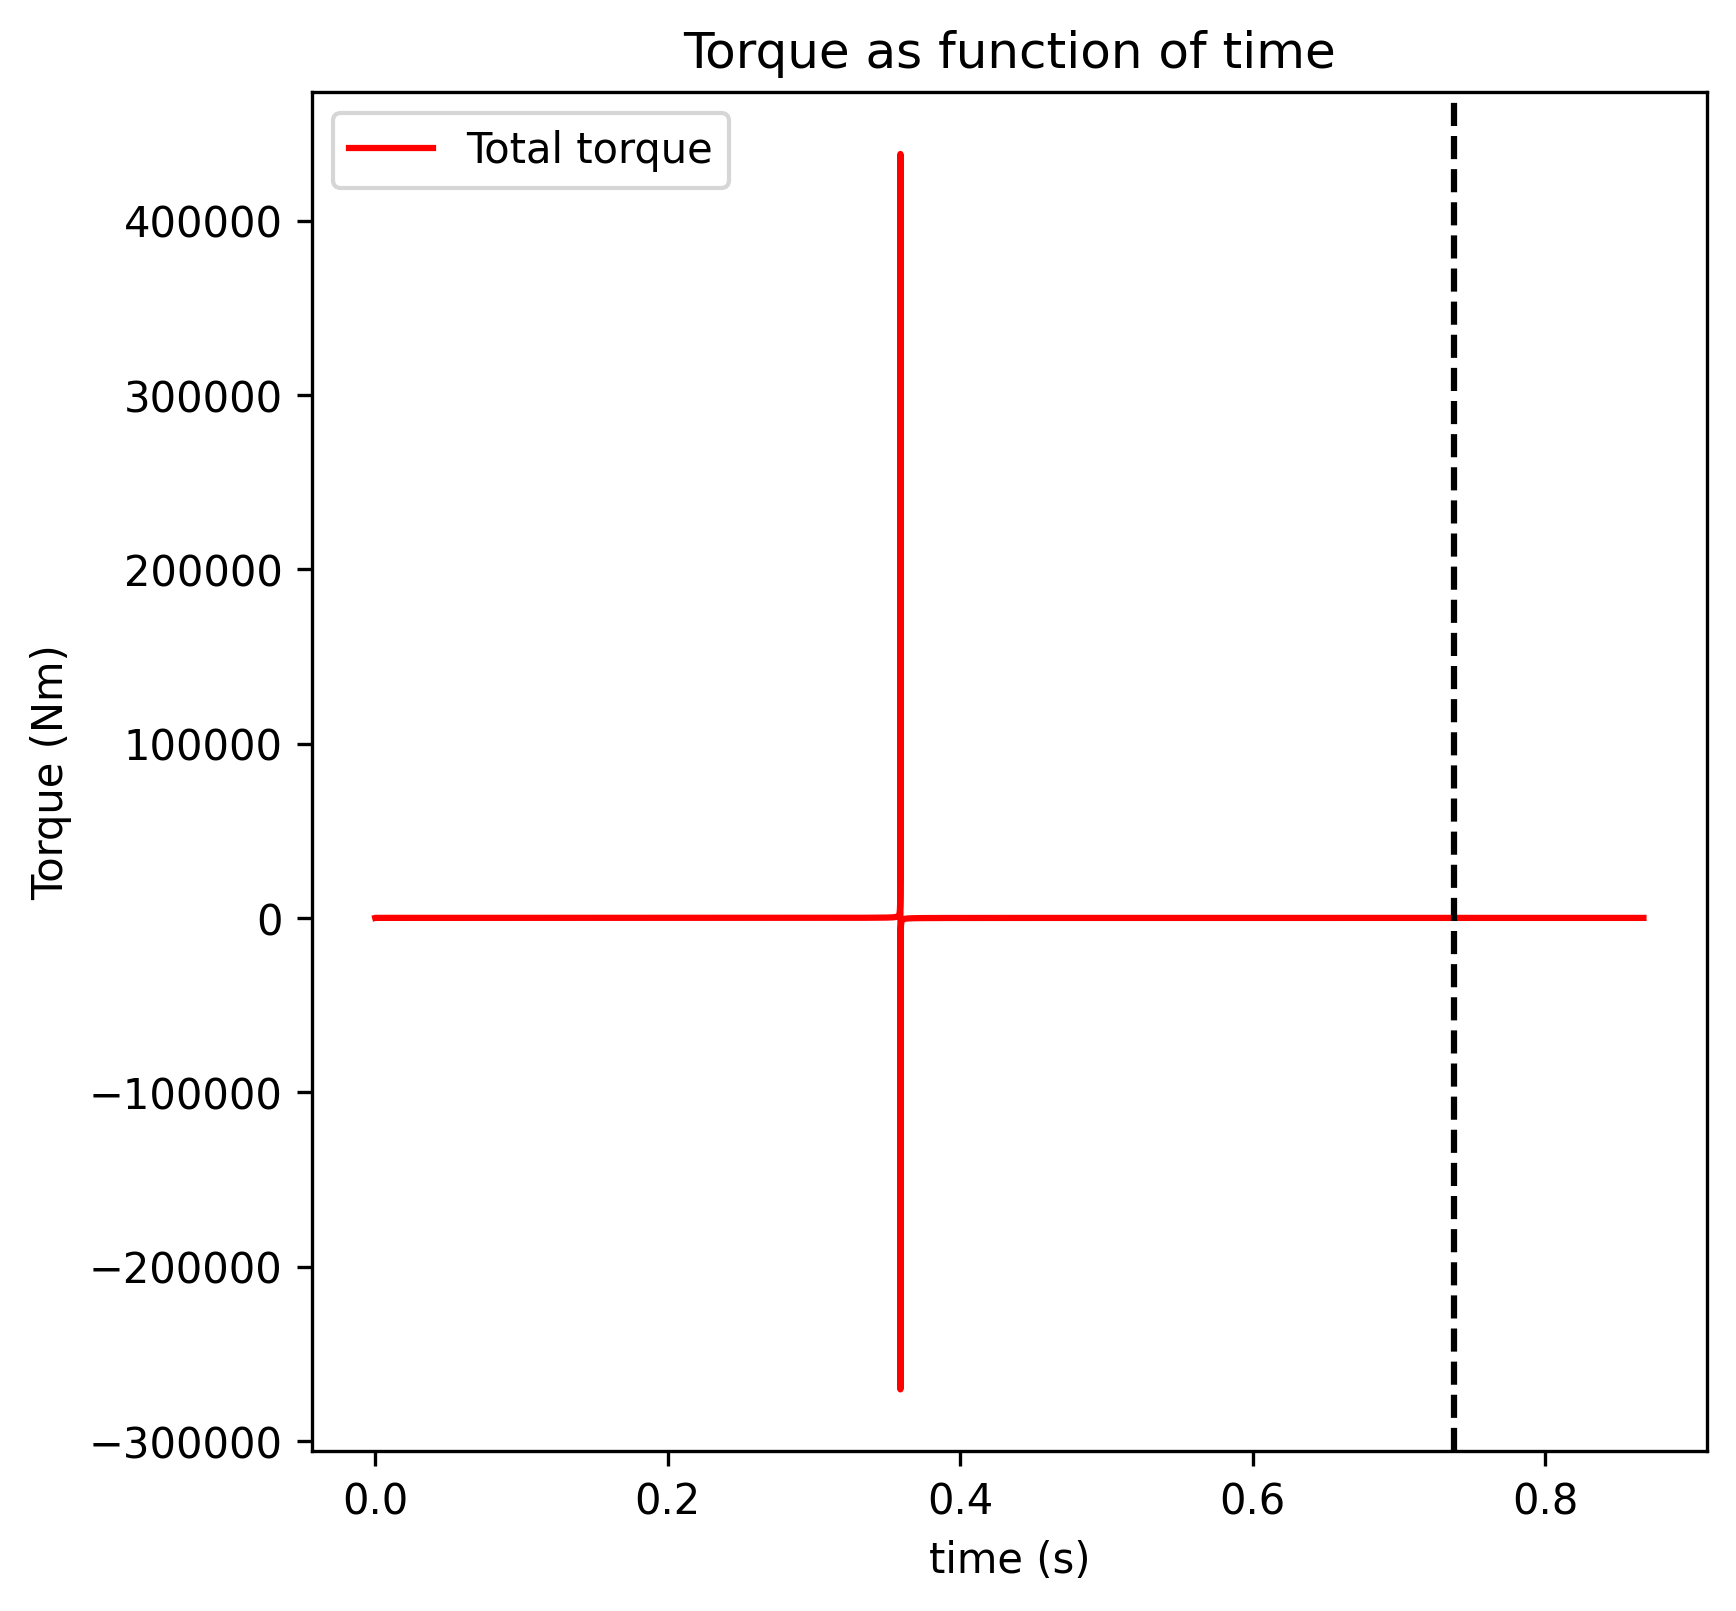

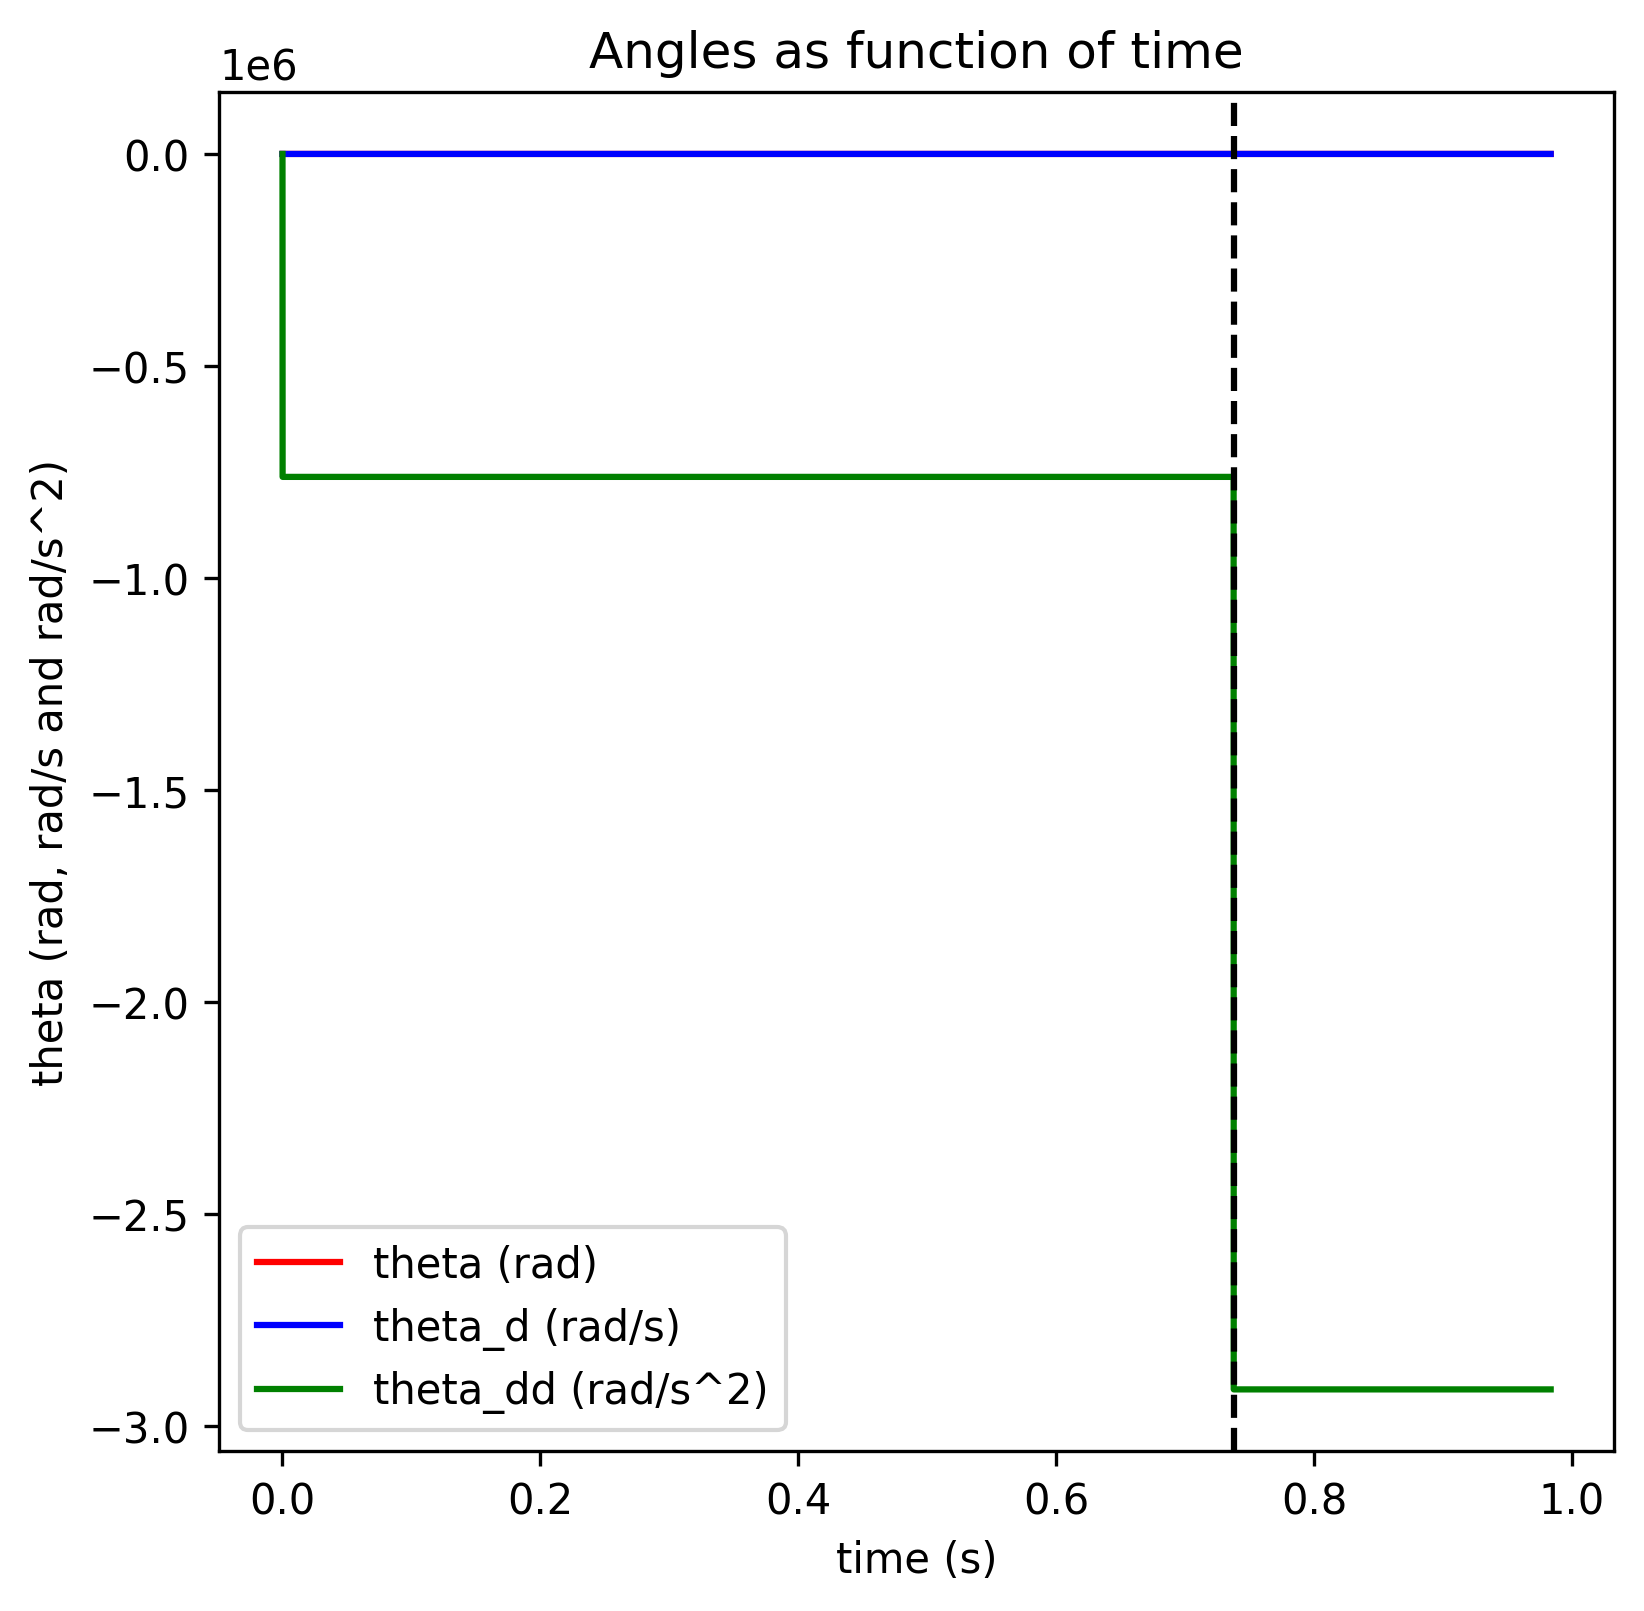

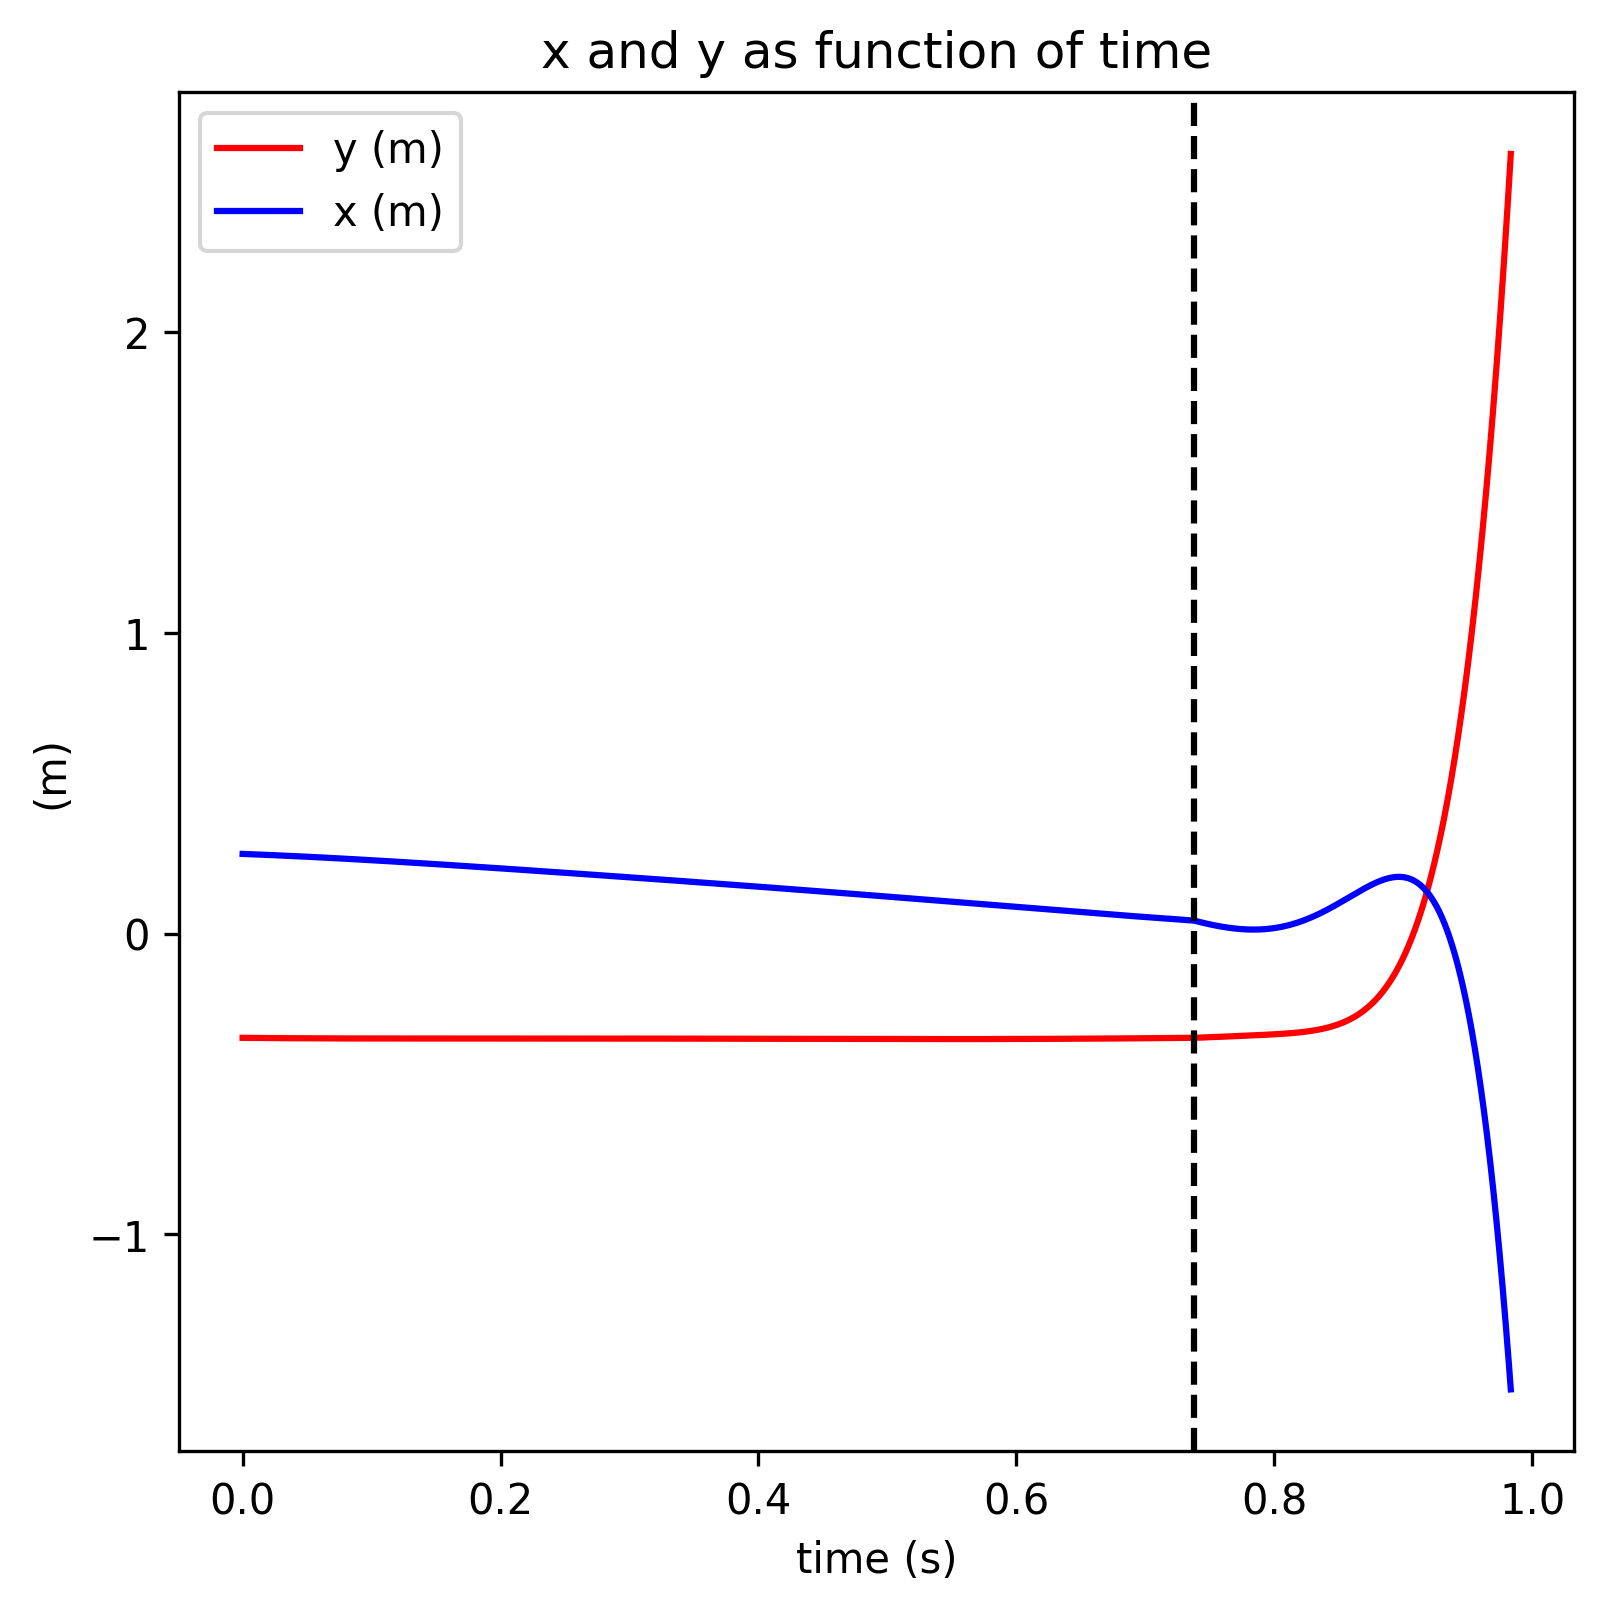

In [20]:
import matplotlib.pyplot as plt
sim_data = np.loadtxt('jansen_simulation_corrected.csv')
print(sim_data.shape)
timings = sim_data[:,0] # first column
thetas = sim_data[:,1]
thetas_d = sim_data[:,2]
thetas_dd = sim_data[:,3]
x = sim_data[:,4]
y = sim_data[:,5]
torques = sim_data[:,6]
print(torques[0:6])

max_torque = np.nanmax(torques)
max_torque_index = np.where(torques == max_torque)
print('Max torque: ',max_torque)
index = max_torque_index[0][0]
print('Found at: ',index)
print('Acceleration at max: ',thetas_dd[index])

## IMPORTANT! In the graphs below

fig_torque = plt.figure(figsize=[6,6],dpi=300)
ax_torque = fig_torque.add_subplot()
ax_torque.plot(timings,torques,'r',label='Total torque')
ax_torque.axvline(x=timings[74999],color='k',linestyle='--') # foot comes off ground, no ground contact forces
ax_torque.legend()
ax_torque.set_xlabel('time (s)')
ax_torque.set_ylabel('Torque (Nm)')
ax_torque.set_title('Torque as function of time')
#plt.savefig('imgout/5_jansen-torques.eps',dpi=600)


fig_angles = plt.figure(figsize=[6,6],dpi=300)
ax_angles = fig_angles.add_subplot()
ax_angles.plot(timings,thetas,'r',label='theta (rad)')
ax_angles.plot(timings,thetas_d,'b',label='theta_d (rad/s)')
ax_angles.plot(timings,thetas_dd,'g',label='theta_dd (rad/s^2)')
ax_angles.axvline(x=timings[74999],color='k',linestyle='--') # foot comes off ground, no ground contact forces
ax_angles.legend()
ax_angles.set_xlabel('time (s)')
ax_angles.set_ylabel('theta (rad, rad/s and rad/s^2)')
ax_angles.set_title('Angles as function of time')
#plt.savefig('imgout/5_jansen-angles.eps',dpi=600)

fig_y = plt.figure(figsize=[6,6],dpi=300)
ax_y = fig_y.add_subplot()
ax_y.plot(timings,y,'r',label='y (m)')
ax_y.plot(timings,x,'b',label='x (m)')
ax_y.axvline(x=timings[74999],color='k',linestyle='--') # foot comes off ground, no ground contact forces
ax_y.legend()
ax_y.set_xlabel('time (s)')
ax_y.set_ylabel('(m)')
ax_y.set_title('x and y as function of time')
#plt.savefig('imgout/5_jansen-xy.eps',dpi=600)